<h1 style="color:#DF2E38; text-align: center;">UNDERSAMPLING</h1>

In [1]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
data = pd.read_csv('online_shoppers_intention.csv')


In [2]:
# Display the class distribution
print("Original class distribution:")
print(data['Revenue'].value_counts())


Original class distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64


In [3]:
# Separate the majority and minority classes
df_majority = data[data.Revenue == False]
df_minority = data[data.Revenue == True]

# Undersample the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_minority), # to match minority class
                                    random_state=42) # reproducible results

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the dataframe to mix the undersampled data
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new class distribution
print("\nNew class distribution:")
print(df_undersampled['Revenue'].value_counts())



New class distribution:
Revenue
False    1908
True     1908
Name: count, dtype: int64


**To address the imbalance in the original dataset where the majority class ('False' for Revenue) heavily outweighed the minority class ('True' for Revenue), undersampling was applied. This resulted in a new dataset where both classes are now balanced with 1908 instances each. This balanced dataset can now be used for model training to potentially improve the model's ability to generalize across both classes.**

<h3 style="color:#DF2E38; text-align: center;">DATA COLLECTION</h3>

In [4]:
# Save the undersampled dataset to a new CSV file
df_undersampled.to_csv('online_shoppers_intention_undersampled.csv', index=False)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2, RFE
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Loading the dataset
df = pd.read_csv('online_shoppers_intention_undersampled.csv')
df

Administrative  Administrative_Duration  Informational  \
0                  3               101.000000              0   
1                  6                96.857143              0   
2                  4               176.913333              1   
3                  2               152.833333              0   
4                  2                27.583333              0   
...              ...                      ...            ...   
3811               2                51.500000              2   
3812               3                29.000000              0   
3813               0                 0.000000              0   
3814               0                 0.000000              0   
3815              22               474.476412              3   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   0.000000              17               300.666667   
1                   0.000000              28               672.545238   
2                  40.800000              72              1548.194444   
3                   0.000000              20               791.666667   
4                   0.000000              22               420.200000   
...                      ...             ...                      ...   
3811               99.500000              15               771.875000   
3812                0.000000               2                11.000000   
3813                0.000000               7               330.166667   
3814                0.000000              13               541.916667   
3815              167.142857              92              2324.820965   

      BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0        0.000000   0.012500    0.000000         0.0   May                 1   
1        0.000000   0.020707   19.714689         0.0   Mar                 1   
2        0.000000   0.007888    1.891943         0.0   Aug                 2   
3        0.011111   0.016667   41.350072         0.0   Mar                 1   
4        0.008696   0.015162    0.000000         0.0   May                 3   
...           ...        ...         ...         ...   ...               ...   
3811     0.010000   0.026667   15.395347         0.0   Dec                 2   
3812     0.075000   0.075000    0.000000         0.0   Dec                 1   
3813     0.000000   0.021429    0.000000         0.0   Dec                 3   
3814     0.000000   0.015385   26.099954         0.0   Dec                 2   
3815     0.014613   0.020072    7.935286         0.0   Nov                 3   

      Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0           8       1            2        New_Visitor    False    False  
1           1       2           10  Returning_Visitor    False     True  
2           4       3            5  Returning_Visitor    False     True  
3           1       1            2        New_Visitor    False     True  
4           2       1            4  Returning_Visitor    False    False  
...       ...     ...          ...                ...      ...      ...  
3811        2       3            2  Returning_Visitor    False    False  
3812        1       4            8  Returning_Visitor    False    False  
3813        2       9            2  Returning_Visitor    False    False  
3814        4       1            2        New_Visitor    False     True  
3815        2       2           13  Returning_Visitor    False     True  

[3816 rows x 18 columns]

<h3 style="color:#DF2E38; text-align: center;">DATA DESCRIPTION</h3>

In [7]:
#Summary of the DataFrame, including the index dtype, column dtypes, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           3816 non-null   int64  
 1   Administrative_Duration  3816 non-null   float64
 2   Informational            3816 non-null   int64  
 3   Informational_Duration   3816 non-null   float64
 4   ProductRelated           3816 non-null   int64  
 5   ProductRelated_Duration  3816 non-null   float64
 6   BounceRates              3816 non-null   float64
 7   ExitRates                3816 non-null   float64
 8   PageValues               3816 non-null   float64
 9   SpecialDay               3816 non-null   float64
 10  Month                    3816 non-null   object 
 11  OperatingSystems         3816 non-null   int64  
 12  Browser                  3816 non-null   int64  
 13  Region                   3816 non-null   int64  
 14  TrafficType             

In [8]:
# Displaying the first few rows of the dataset
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               3               101.000000              0   
1               6                96.857143              0   
2               4               176.913333              1   
3               2               152.833333              0   
4               2                27.583333              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0              17               300.666667   
1                     0.0              28               672.545238   
2                    40.8              72              1548.194444   
3                     0.0              20               791.666667   
4                     0.0              22               420.200000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.012500    0.000000         0.0   May                 1   
1     0.000000   0.020707   19.714689         0.0   Mar   

In [9]:
# Displaying the last few rows of the dataset
print(df.tail())

      Administrative  Administrative_Duration  Informational  \
3811               2                51.500000              2   
3812               3                29.000000              0   
3813               0                 0.000000              0   
3814               0                 0.000000              0   
3815              22               474.476412              3   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
3811               99.500000              15               771.875000   
3812                0.000000               2                11.000000   
3813                0.000000               7               330.166667   
3814                0.000000              13               541.916667   
3815              167.142857              92              2324.820965   

      BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
3811     0.010000   0.026667   15.395347         0.0   Dec                 2   
3812     0.07500

In [10]:
df.shape

(3816, 18)

<h3 style="color:#DF2E38; text-align: center;">EDA  (Exploratory Data Analysis) </h3>

In [11]:
# Check for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There is no null values in the dataset

In [12]:
# Check for duplicate row
df.duplicated().sum()

6

In [13]:
# Check the datatypes
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [14]:
# Identify numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

In [15]:
# Identify categorical columns
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
categorical_features

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [16]:
# Perform descriptive statistics
df.describe(include='all')

Administrative  Administrative_Duration  Informational  \
count      3816.000000              3816.000000    3816.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.764151                96.043648       0.613732   
std           3.496478               183.482894       1.380319   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                29.000000       0.000000   
75%           4.000000               115.000000       1.000000   
max          26.000000              2086.750000      14.000000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count              3816.000000     3816.000000              3816.000000   
unique                     NaN             NaN                      NaN   
top                        NaN             NaN                      NaN   
freq                       NaN             NaN                      NaN   
mean                 42.839466       37.868187              1445.015299   
std                 146.496629       49.464012              1982.852566   
min                   0.000000        0.000000                 0.000000   
25%                   0.000000       10.000000               289.541667   
50%                   0.000000       22.000000               783.470833   
75%                   0.000000       45.000000              1783.566667   
max                1767.666667      534.000000             27009.859430   

        BounceRates    ExitRates   PageValues   SpecialDay Month  \
count   3816.000000  3816.000000  3816.000000  3816.000000  3816   
unique          NaN          NaN          NaN          NaN    10   
top             NaN          NaN          NaN          NaN   Nov   
freq            NaN          NaN          NaN          NaN  1173   
mean       0.015112     0.033643    14.603190     0.048270   NaN   
std        0.039090     0.040651    28.528079     0.180016   NaN   
min        0.000000     0.000000     0.000000     0.000000   NaN   
25%        0.000000     0.011765     0.000000     0.000000   NaN   
50%        0.000815     0.020739     0.000000     0.000000   NaN   
75%        0.011111     0.036665    18.677150     0.000000   NaN   
max        0.200000     0.200000   361.763742     1.000000   NaN   

        OperatingSystems      Browser       Region  TrafficType  \
count        3816.000000  3816.000000  3816.000000  3816.000000   
unique               NaN          NaN          NaN          NaN   
top                  NaN          NaN          NaN          NaN   
freq                 NaN          NaN          NaN          NaN   
mean            2.114256     2.408019     3.129193     3.978774   
std             0.914451     1.795415     2.389761     3.895869   
min             1.000000     1.000000     1.000000     1.000000   
25%             2.000000     2.000000     1.000000     2.000000   
50%             2.000000     2.000000     3.000000     2.000000   
75%             2.000000     2.000000     4.000000     4.000000   
max             8.000000    13.000000     9.000000    20.000000   

              VisitorType Weekend Revenue  
count                3816    3816    3816  
unique                  3       2       2  
top     Returning_Visitor   False   False  
freq                 3104    2891    1908  
mean                  NaN     NaN     NaN  
std                   NaN     NaN     NaN  
min                   NaN     NaN     NaN  
25%                   NaN     NaN     NaN  
50%                   NaN     NaN     NaN  
75%                   NaN     NaN     NaN  
max                   NaN     NaN     NaN

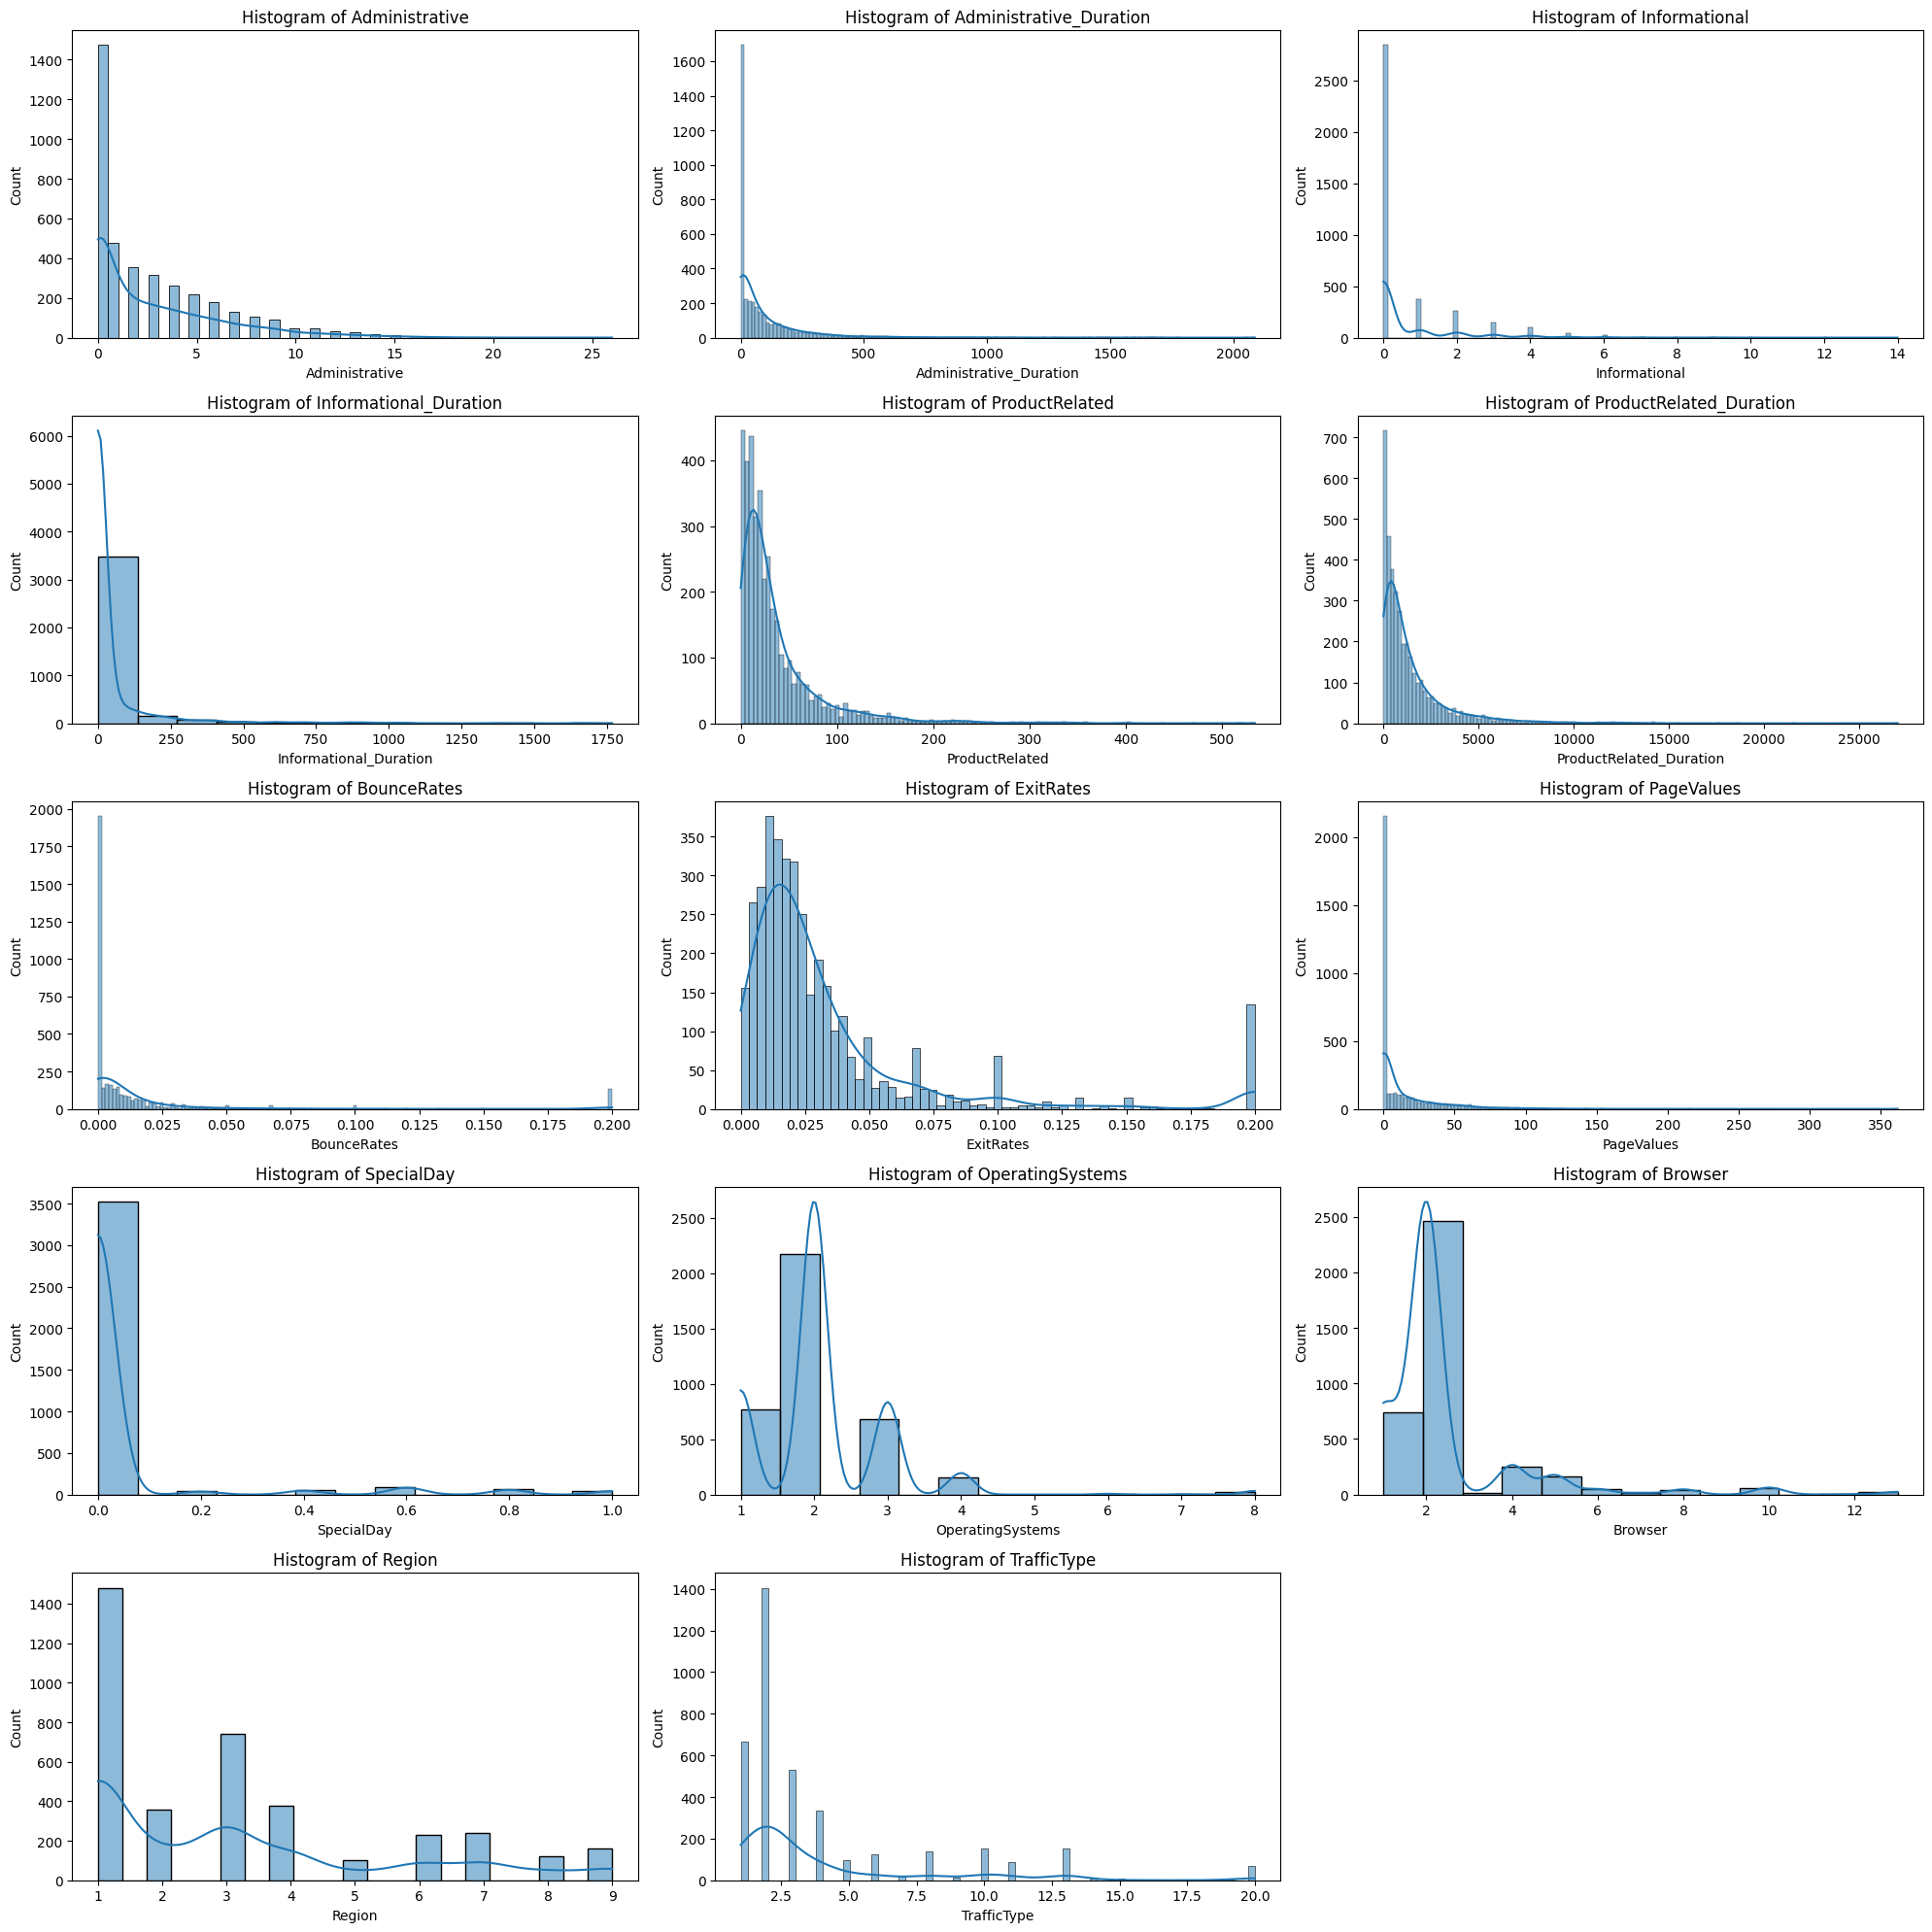

In [17]:
# Histograms for numerical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()

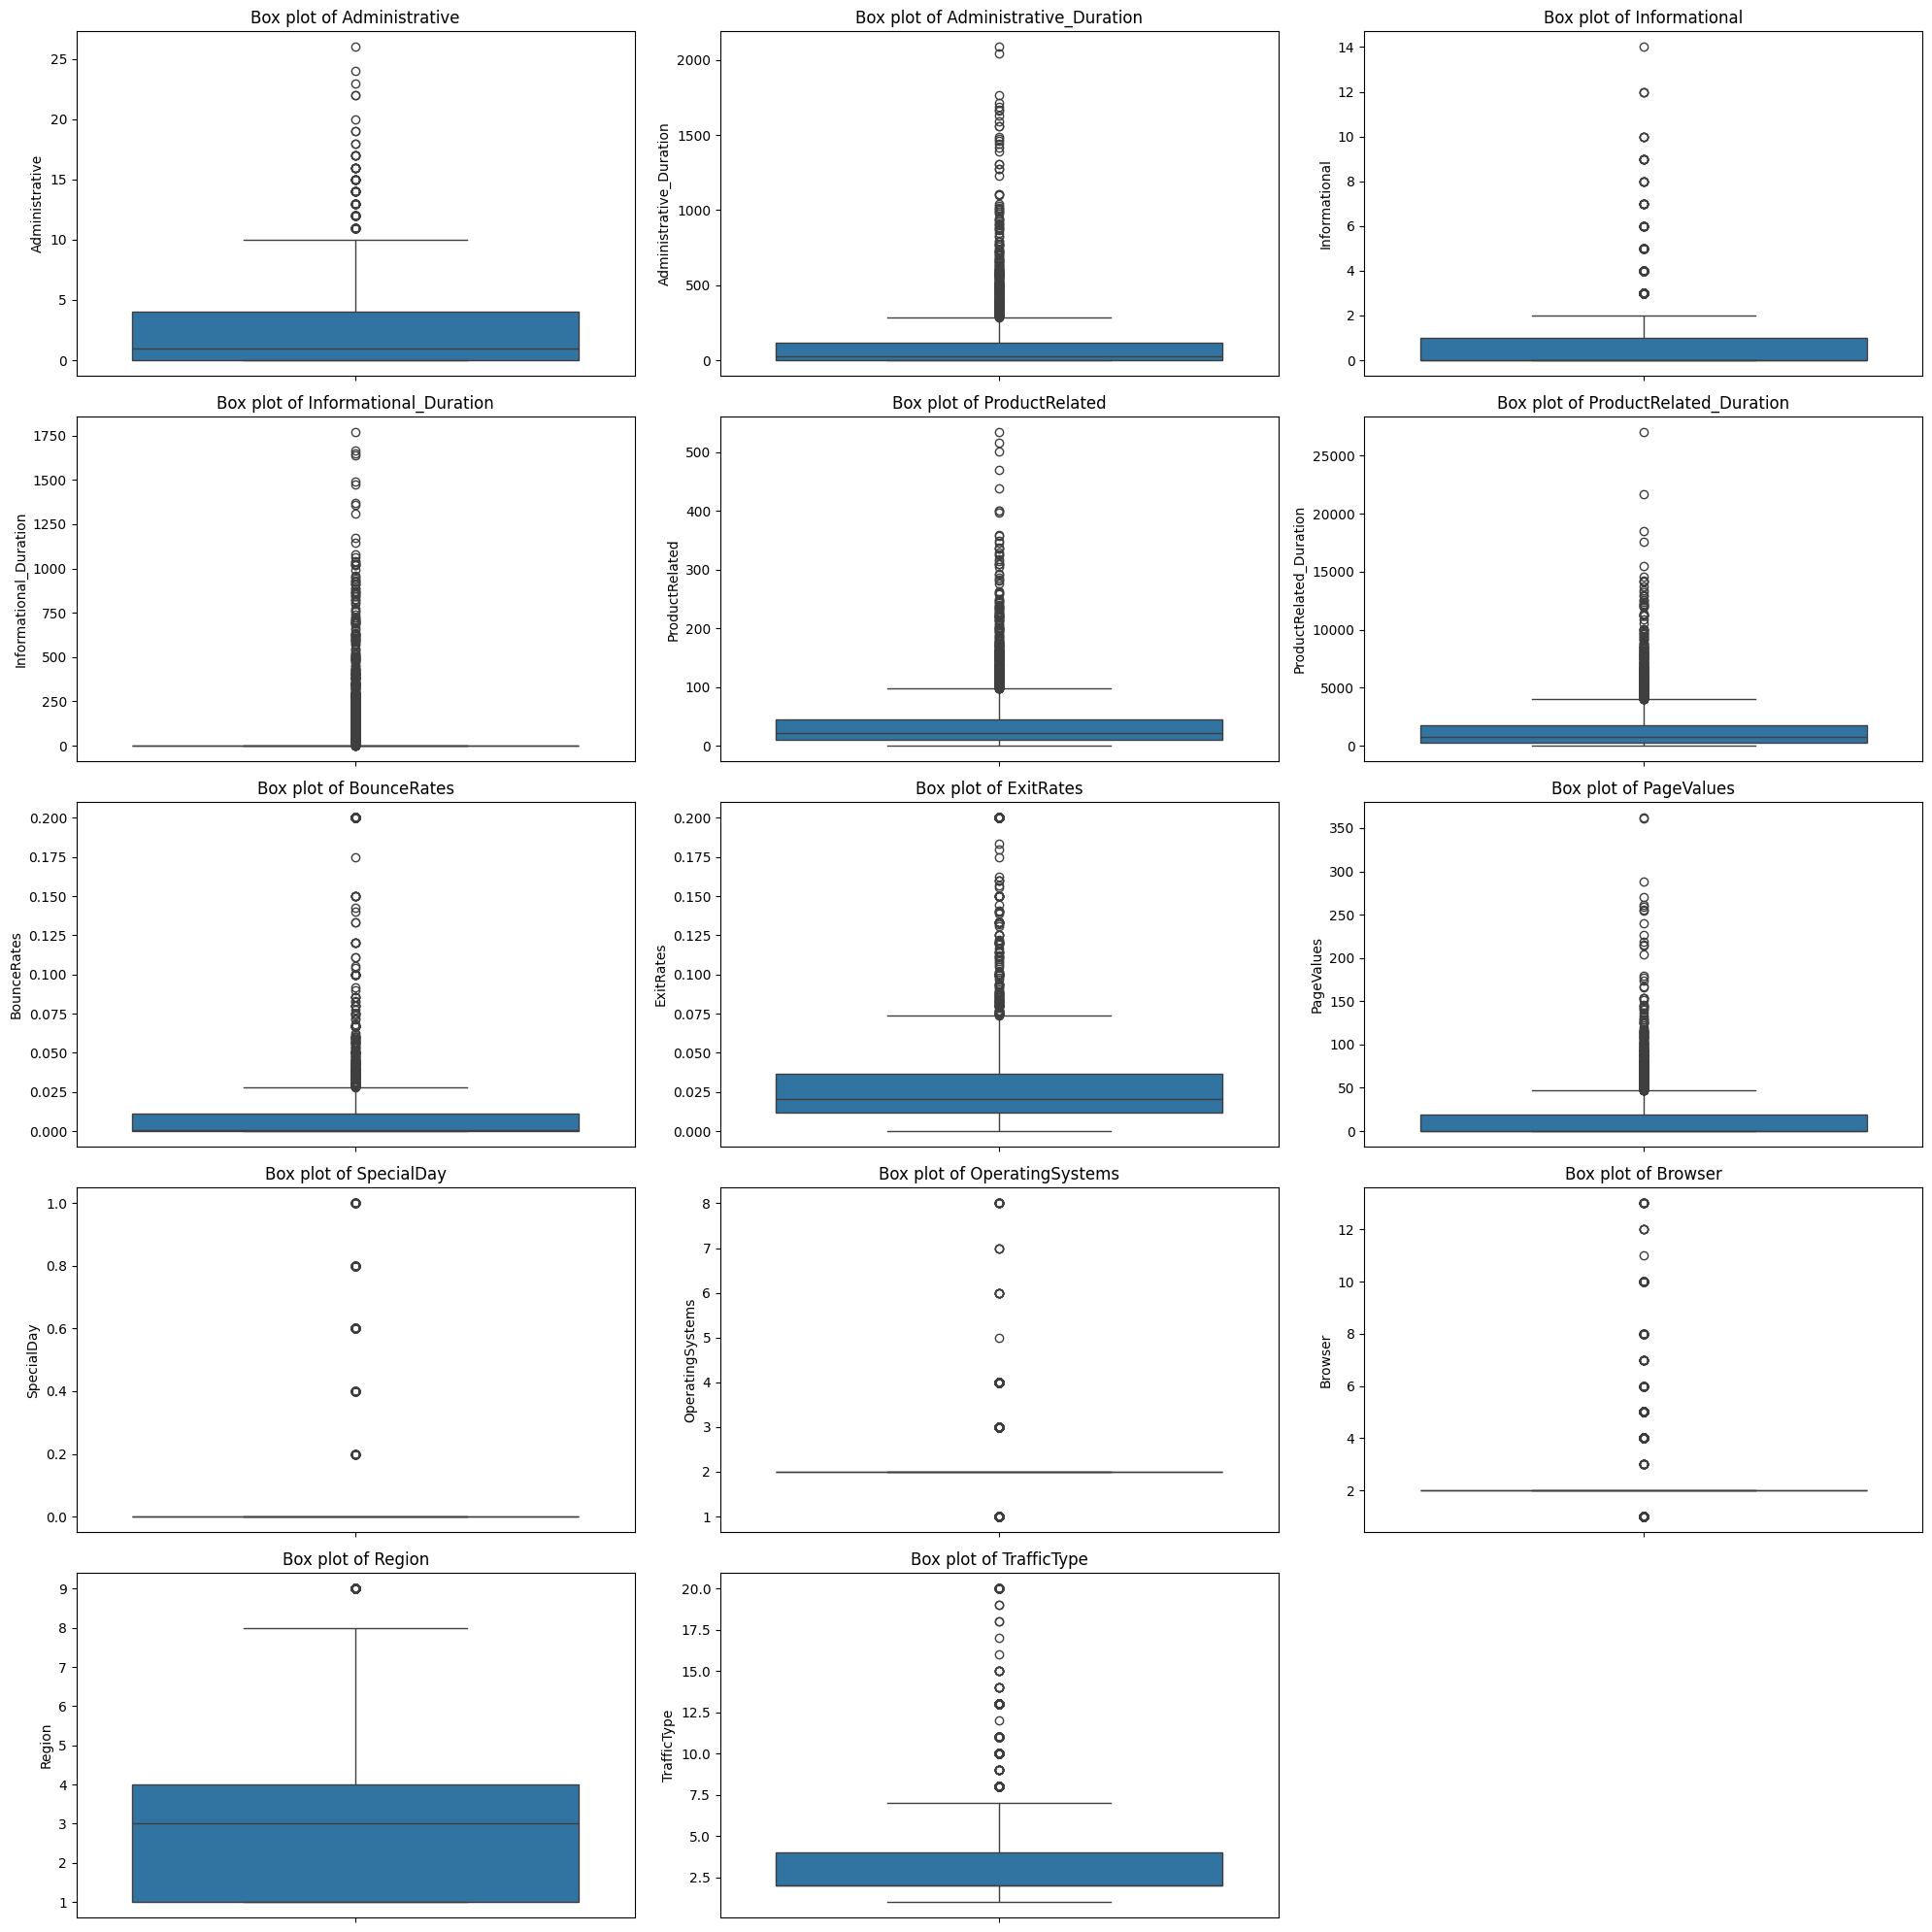

In [18]:
# Box plots for numerical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()

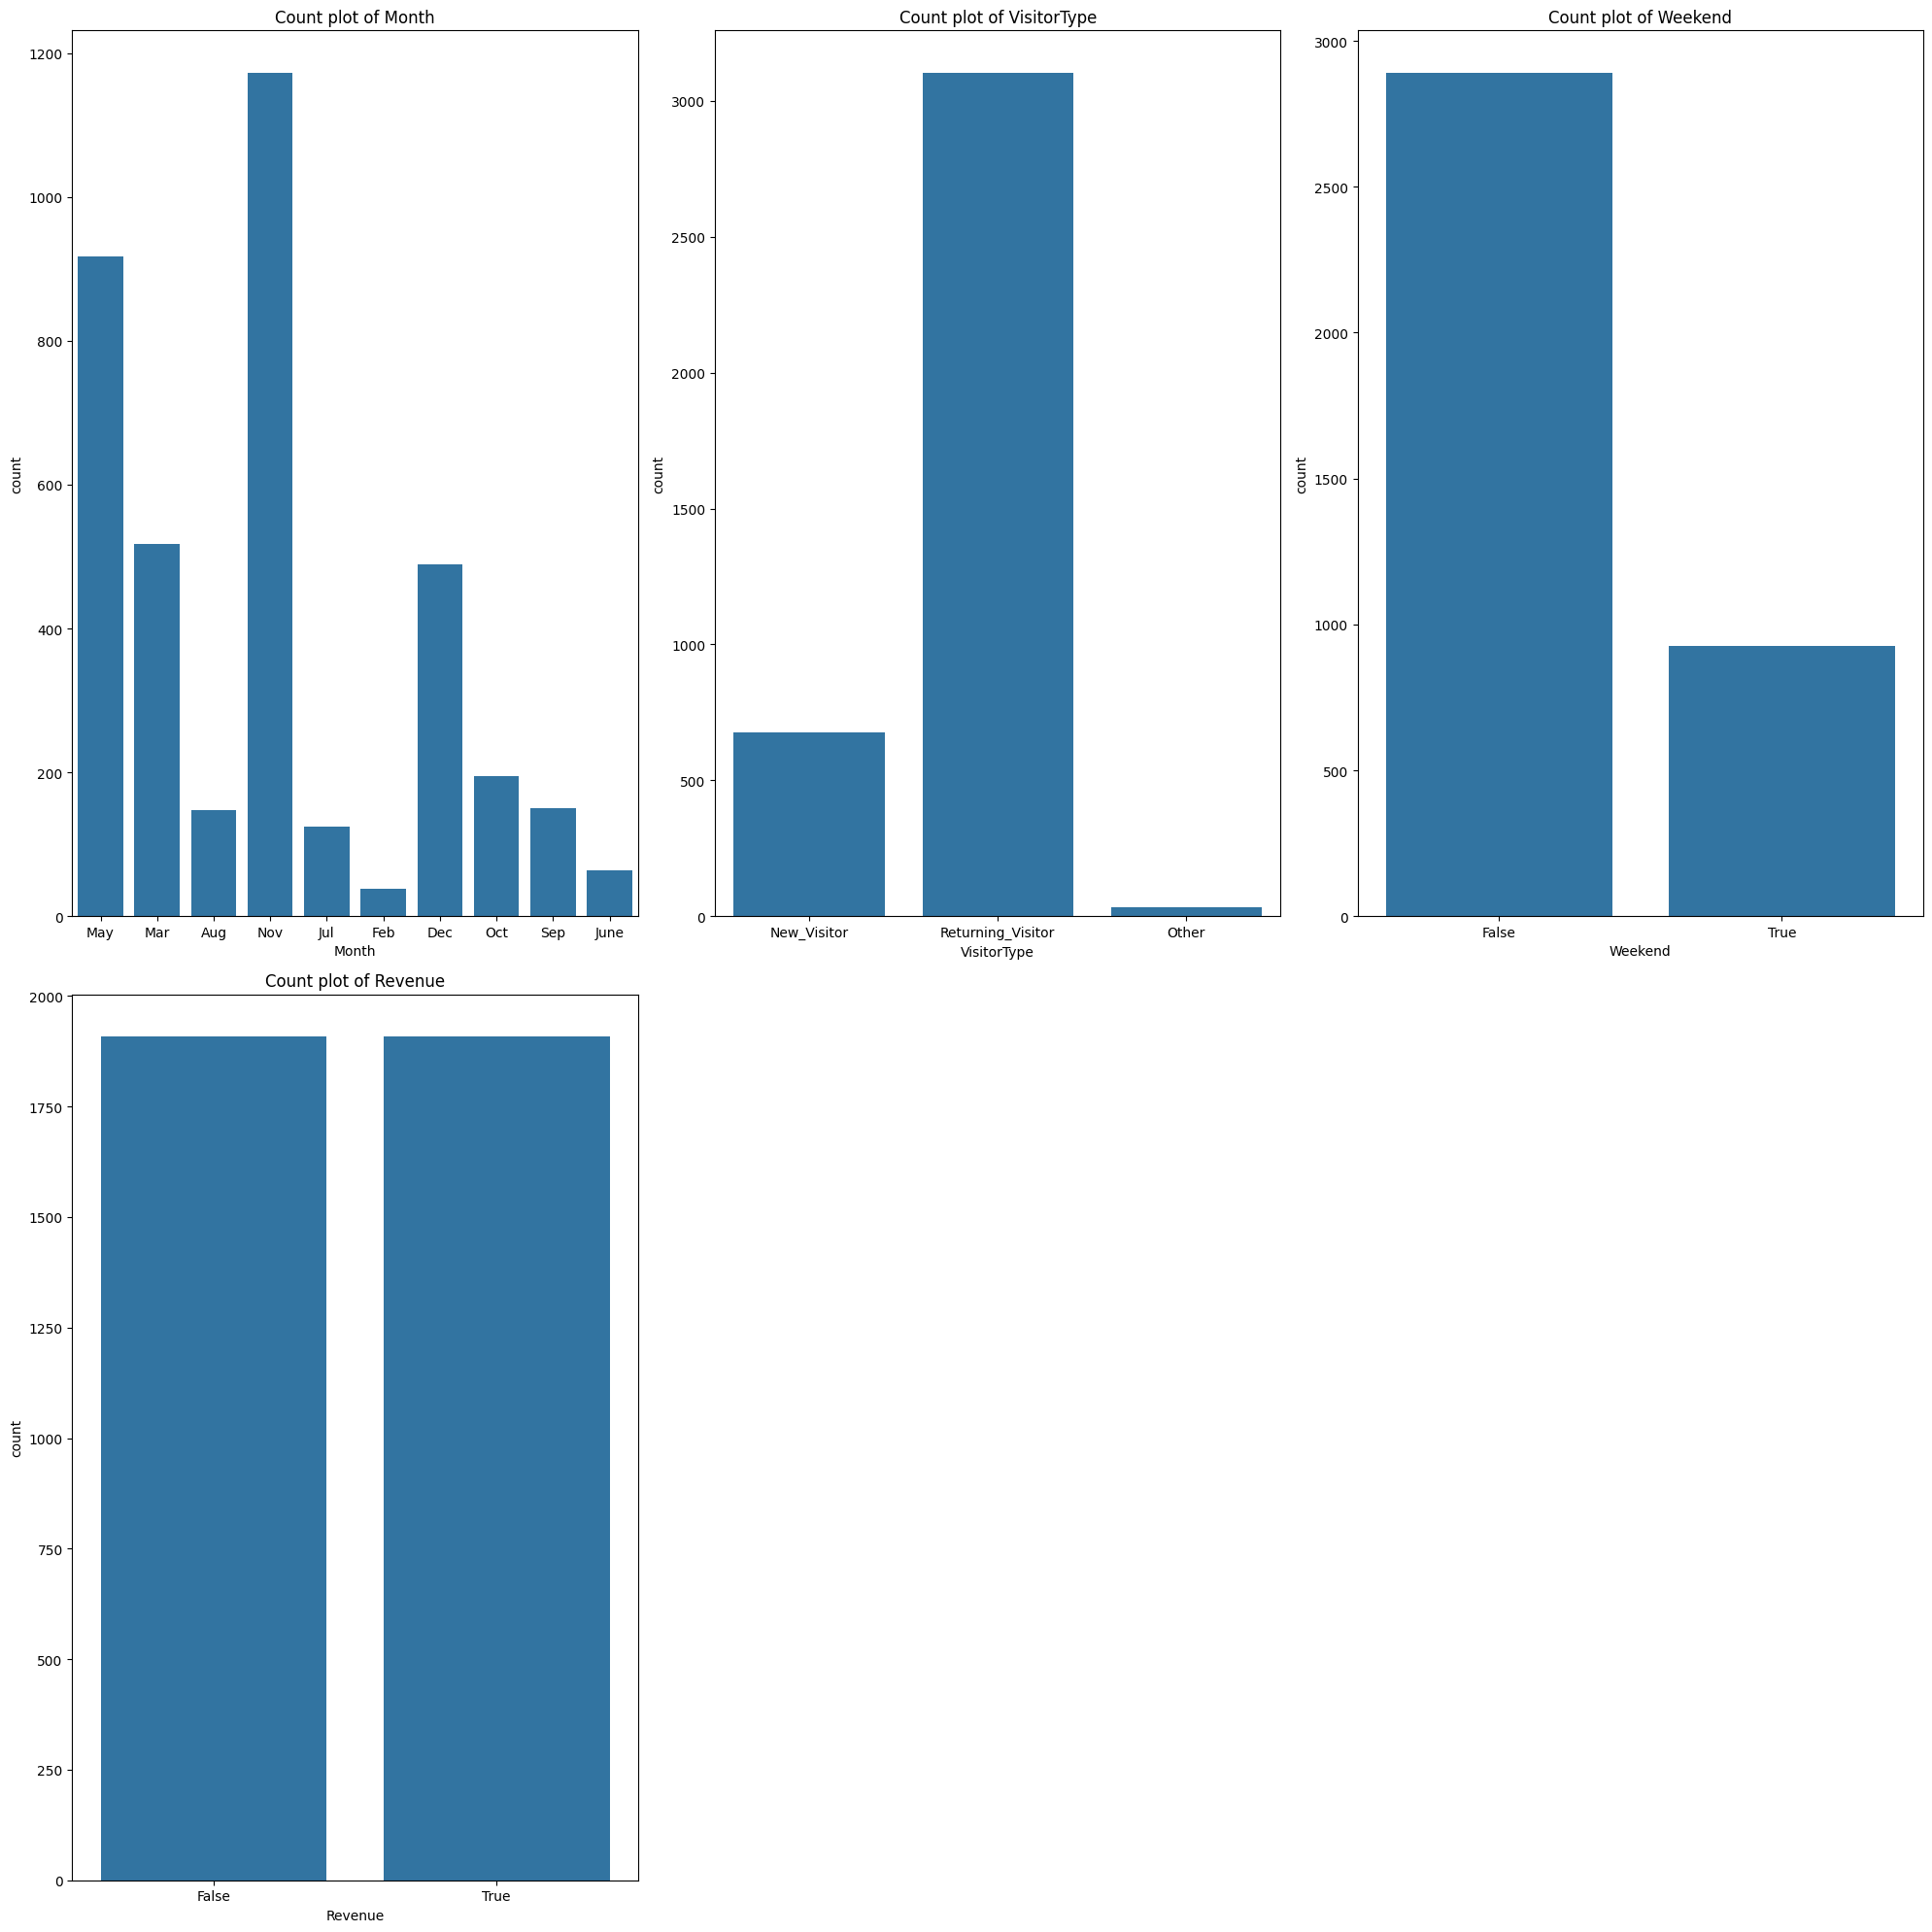

In [19]:
# Count plots for categorical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features)//3 + 1, 3, i+1)
    sns.countplot(x=df[feature])
    plt.title(f'Count plot of {feature}')
plt.tight_layout()

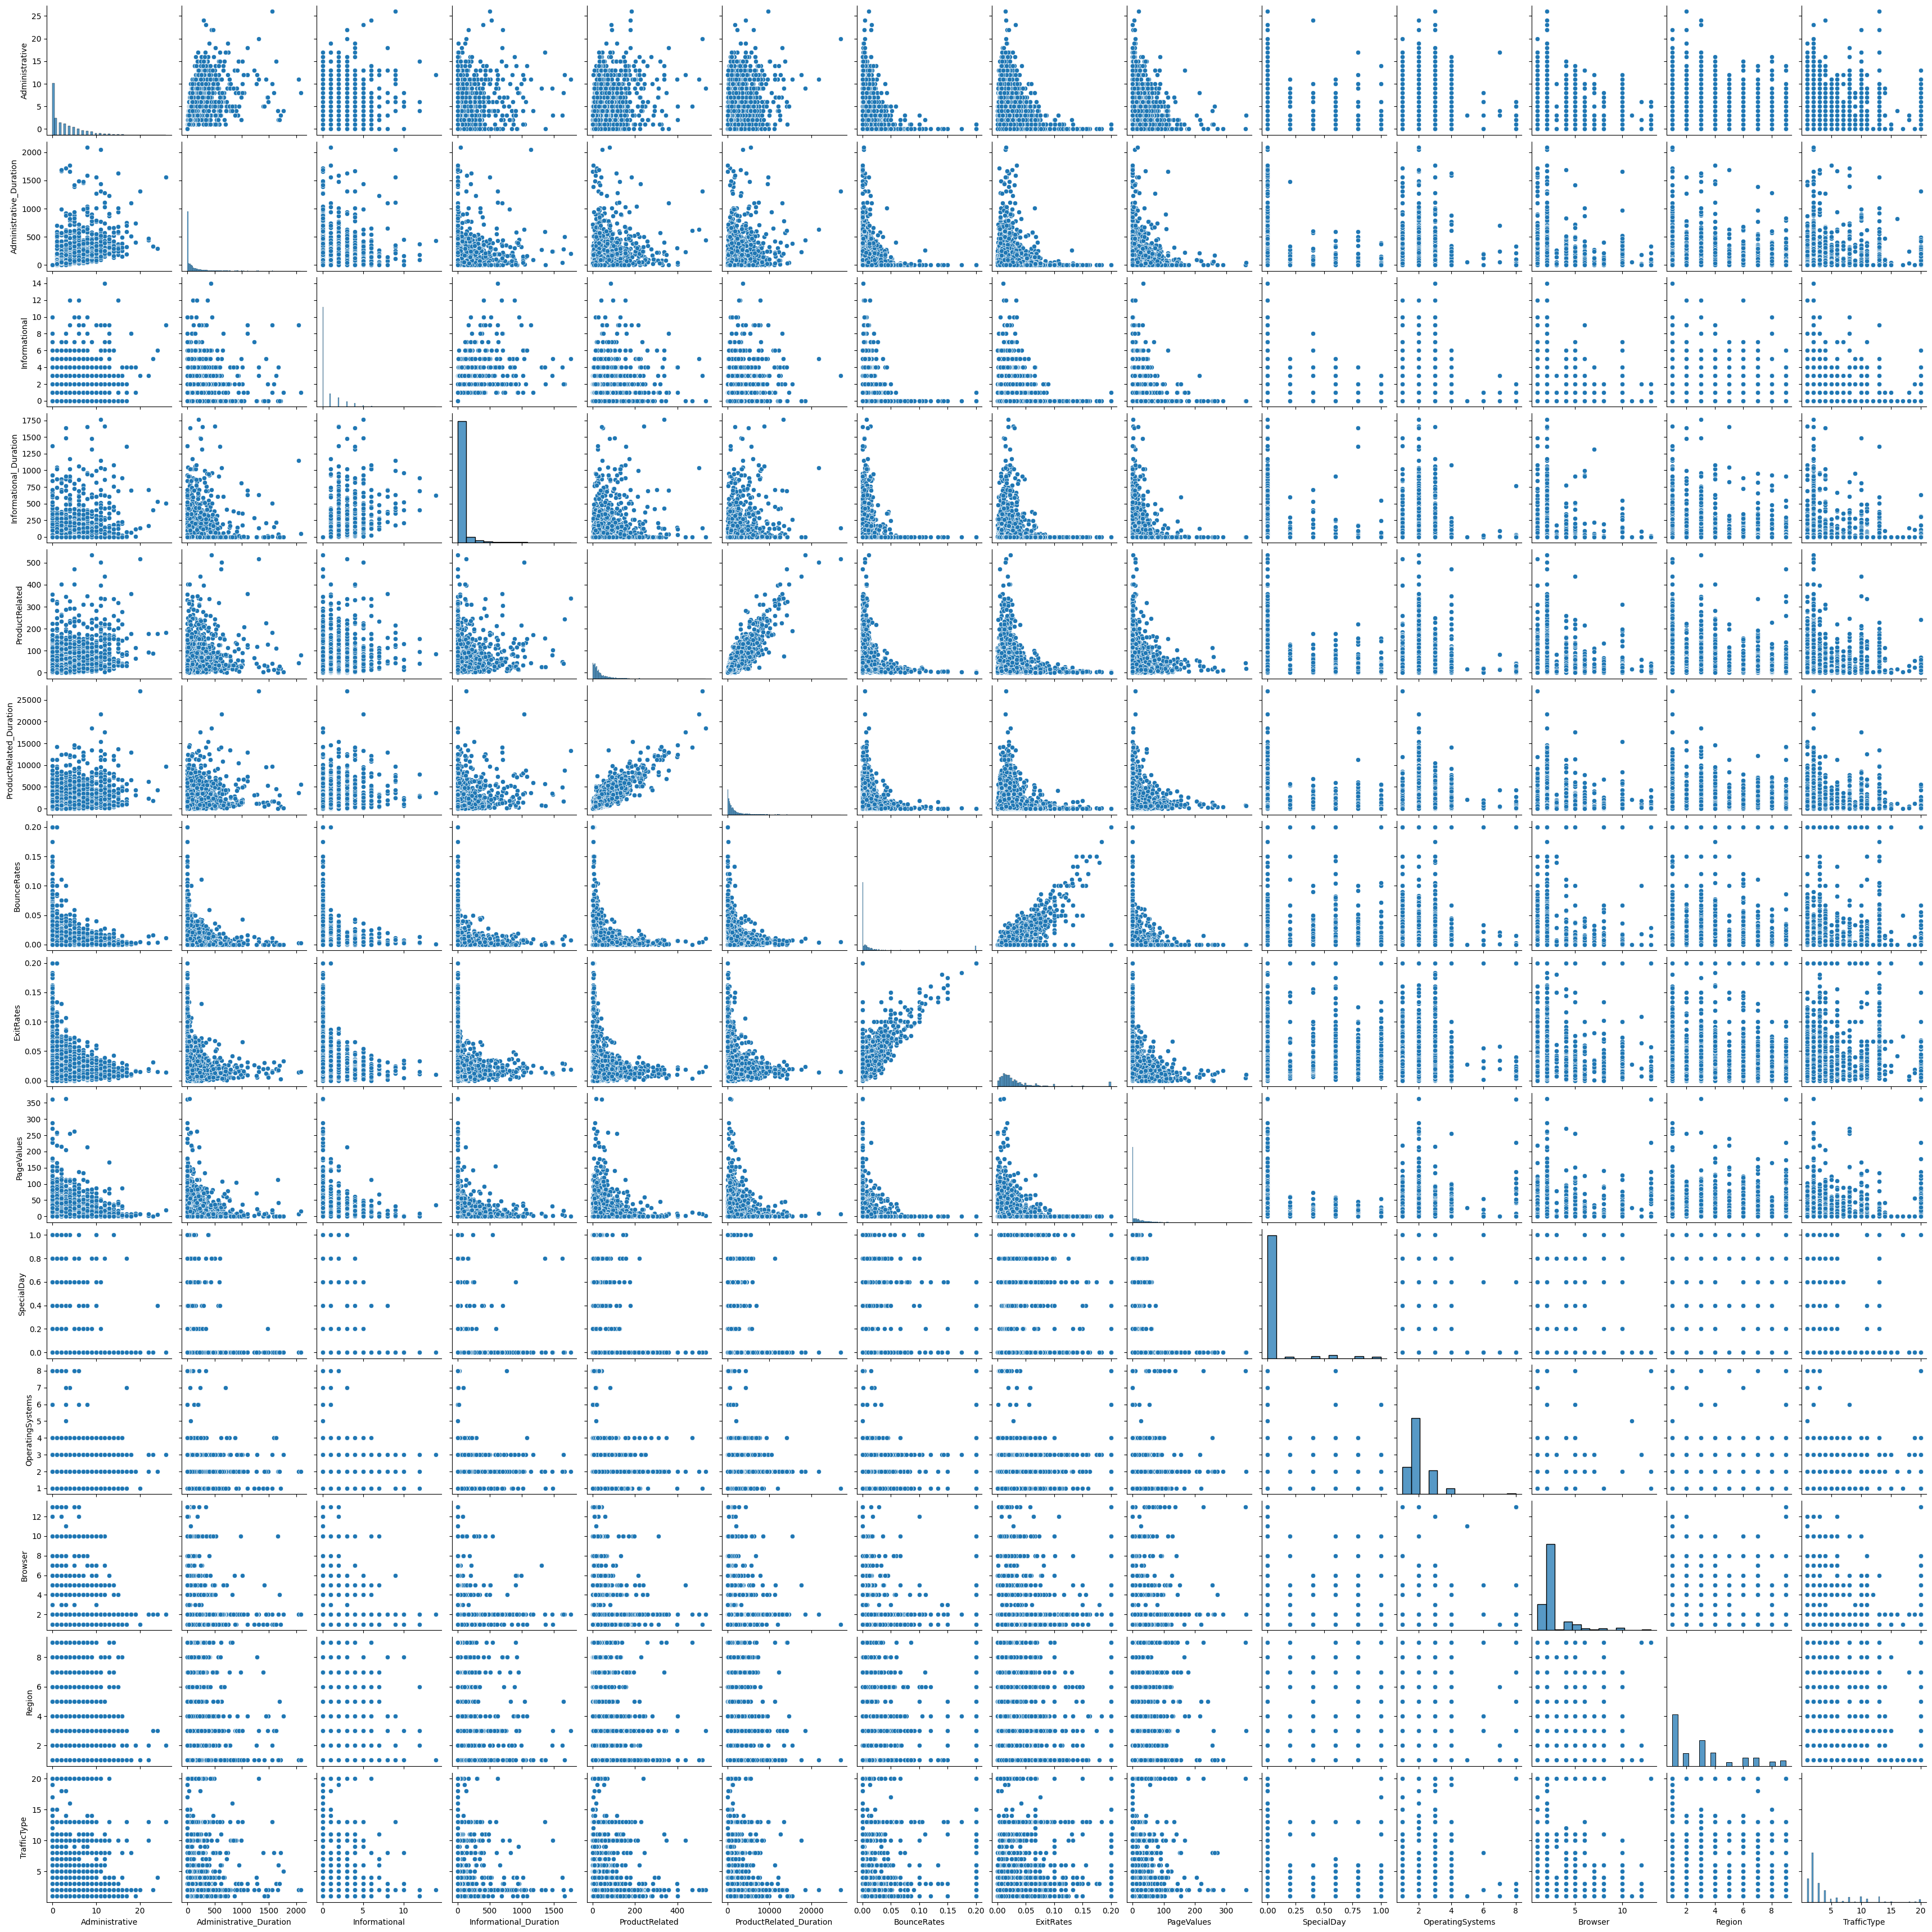

In [20]:
# Scatter plot matrix to visualize relationships between numerical features
sns.pairplot(df[numerical_features])

Text(0.5, 1.0, 'Correlation Matrix')

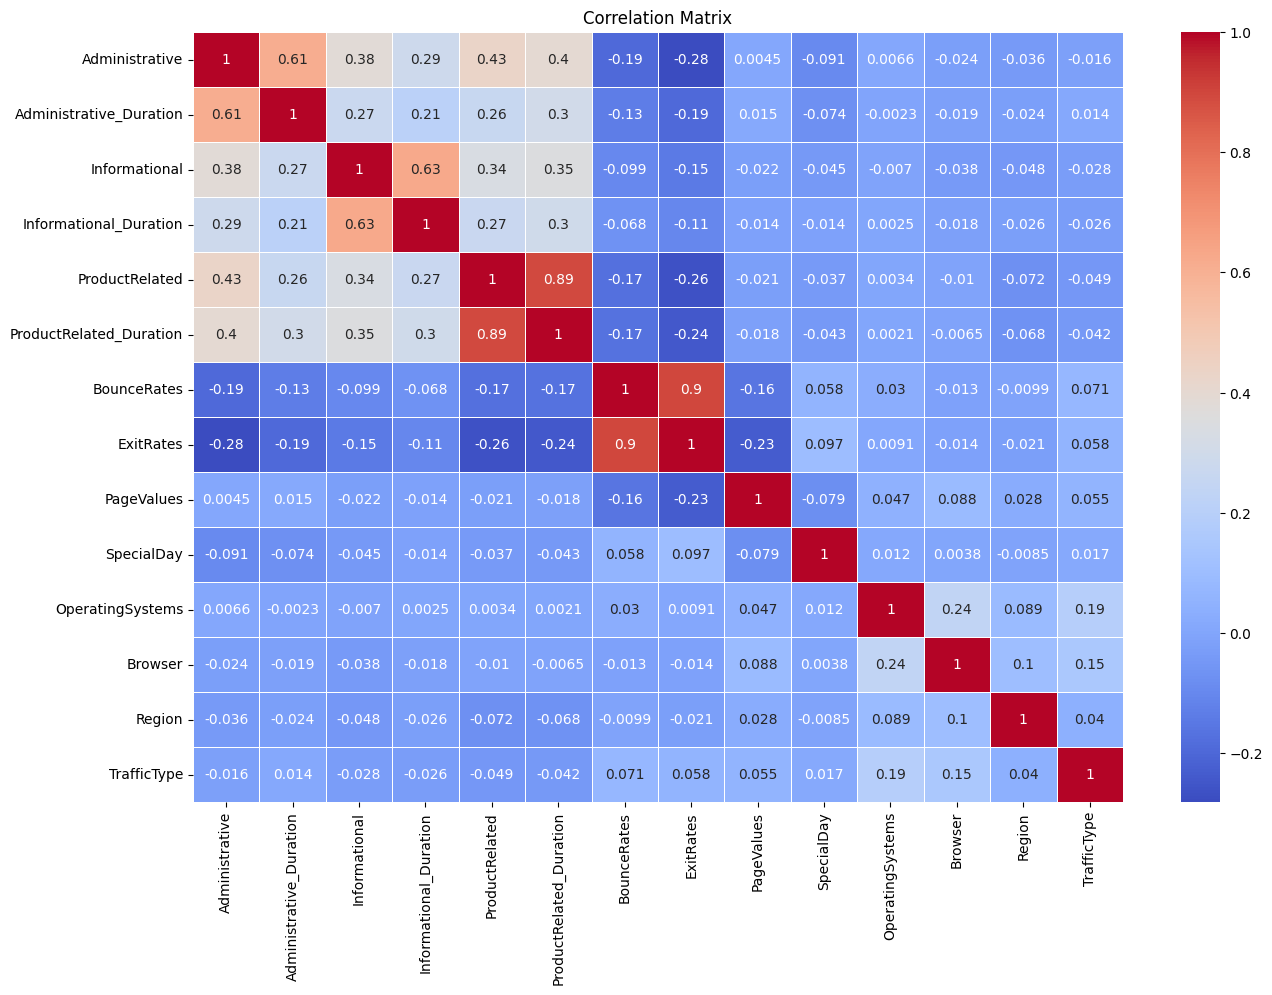

In [21]:
# Correlation matrix
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

In [22]:
# Skewness 
print("\nSkewness of numerical features:")
print(df[numerical_features].skew())


Skewness of numerical features:
Administrative             1.661826
Administrative_Duration    4.438226
Informational              3.282368
Informational_Duration     5.665713
ProductRelated             3.560044
ProductRelated_Duration    3.546985
BounceRates                3.930551
ExitRates                  2.795778
PageValues                 4.092663
SpecialDay                 3.876905
OperatingSystems           2.299525
Browser                    3.180664
Region                     1.003599
TrafficType                2.103571
dtype: float64


In [23]:
# Kurtosis
print("\nKurtosis of numerical features:")
print(df[numerical_features].kurtosis())


Kurtosis of numerical features:
Administrative              3.283838
Administrative_Duration    28.418125
Informational              14.504939
Informational_Duration     40.370000
ProductRelated             18.971446
ProductRelated_Duration    20.788776
BounceRates                15.190723
ExitRates                   8.086717
PageValues                 27.684234
SpecialDay                 14.319713
OperatingSystems           11.702013
Browser                    12.005953
Region                     -0.085510
TrafficType                 4.384237
dtype: float64


<h3 style="color:#DF2E38; text-align: center;">DATA PREPROCESSING </h3>

In [24]:
# Check for missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [25]:
# Check for duplicates
df.duplicated().sum()

6

In [26]:
# Remove duplicates
df=df.drop_duplicates()
df

Administrative  Administrative_Duration  Informational  \
0                  3               101.000000              0   
1                  6                96.857143              0   
2                  4               176.913333              1   
3                  2               152.833333              0   
4                  2                27.583333              0   
...              ...                      ...            ...   
3811               2                51.500000              2   
3812               3                29.000000              0   
3813               0                 0.000000              0   
3814               0                 0.000000              0   
3815              22               474.476412              3   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   0.000000              17               300.666667   
1                   0.000000              28               672.545238   
2                  40.800000              72              1548.194444   
3                   0.000000              20               791.666667   
4                   0.000000              22               420.200000   
...                      ...             ...                      ...   
3811               99.500000              15               771.875000   
3812                0.000000               2                11.000000   
3813                0.000000               7               330.166667   
3814                0.000000              13               541.916667   
3815              167.142857              92              2324.820965   

      BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0        0.000000   0.012500    0.000000         0.0   May                 1   
1        0.000000   0.020707   19.714689         0.0   Mar                 1   
2        0.000000   0.007888    1.891943         0.0   Aug                 2   
3        0.011111   0.016667   41.350072         0.0   Mar                 1   
4        0.008696   0.015162    0.000000         0.0   May                 3   
...           ...        ...         ...         ...   ...               ...   
3811     0.010000   0.026667   15.395347         0.0   Dec                 2   
3812     0.075000   0.075000    0.000000         0.0   Dec                 1   
3813     0.000000   0.021429    0.000000         0.0   Dec                 3   
3814     0.000000   0.015385   26.099954         0.0   Dec                 2   
3815     0.014613   0.020072    7.935286         0.0   Nov                 3   

      Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0           8       1            2        New_Visitor    False    False  
1           1       2           10  Returning_Visitor    False     True  
2           4       3            5  Returning_Visitor    False     True  
3           1       1            2        New_Visitor    False     True  
4           2       1            4  Returning_Visitor    False    False  
...       ...     ...          ...                ...      ...      ...  
3811        2       3            2  Returning_Visitor    False    False  
3812        1       4            8  Returning_Visitor    False    False  
3813        2       9            2  Returning_Visitor    False    False  
3814        4       1            2        New_Visitor    False     True  
3815        2       2           13  Returning_Visitor    False     True  

[3810 rows x 18 columns]

#### Outlier Detection And Treatment

In [27]:
# Define the whisker function
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [28]:
# Iterate over each numerical feature to find and handle outliers
for feature in numerical_features:
    lw, uw = whisker(df[feature])
    
    # Cap the outliers
    df[feature] = np.where(df[feature] < lw, lw, df[feature])
    df[feature] = np.where(df[feature] > uw, uw, df[feature])

In [29]:
# Check the first few rows of the dataset after outlier handling
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0             3.0               101.000000            0.0   
1             6.0                96.857143            0.0   
2             4.0               176.913333            1.0   
3             2.0               152.833333            0.0   
4             2.0                27.583333            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0            17.0               300.666667   
1                     0.0            28.0               672.545238   
2                     0.0            72.0              1548.194444   
3                     0.0            20.0               791.666667   
4                     0.0            22.0               420.200000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.012500    0.000000         0.0   May               2.0   
1     0.000000   0.020707   19.714689         0.0   Mar   

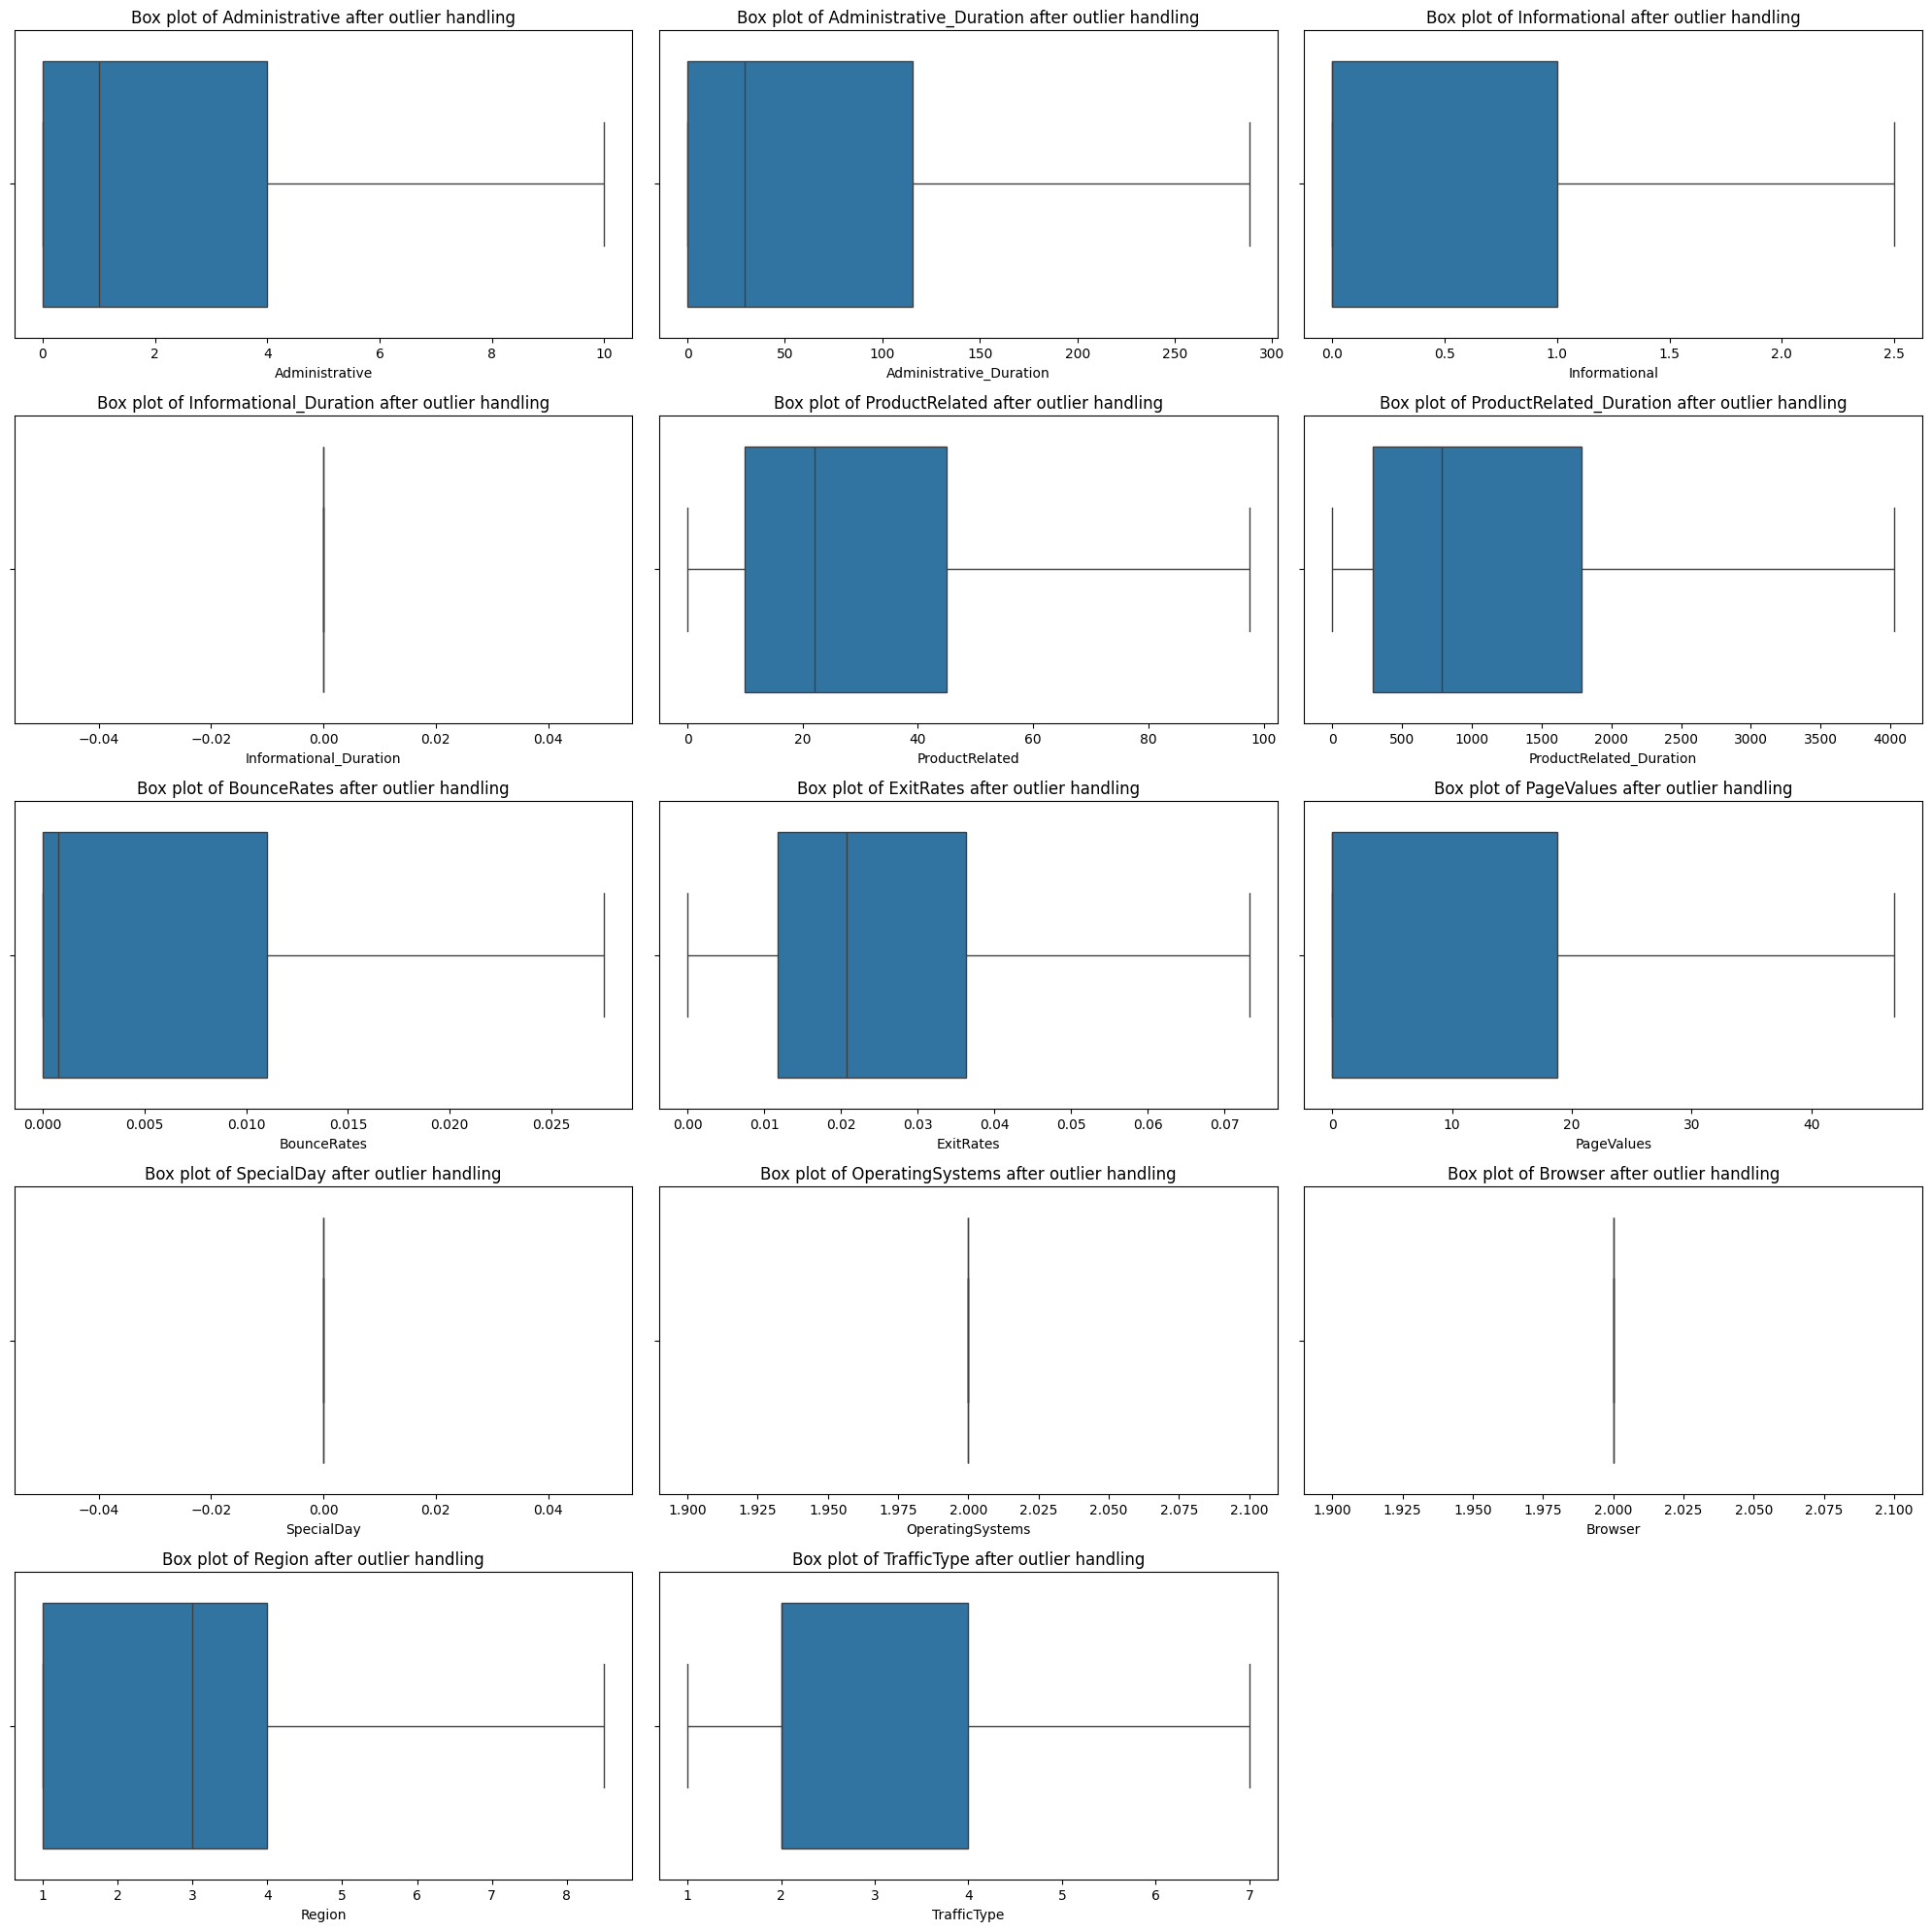

In [30]:
# Visualize the distribution of numerical features after outlier handling
plt.figure(figsize=(20, 20))
for i,feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature} after outlier handling')
    plt.tight_layout()

In [31]:
df.shape

(3810, 18)

In [32]:
from scipy.stats import skew
def apply_transformations(df, features):
    transformed_data = df.copy()
    for feature in features:
        if skew(df[feature]) > 0.5:
            transformed_data[feature + '_sqrt'] = np.sqrt(df[feature] + 1)
            transformed_data[feature + '_log'] = np.log1p(df[feature])
    return transformed_data

In [33]:
# Apply transformations
transformed_df = apply_transformations(df, numerical_features)

In [34]:
# Initialize an empty list to store skewness values
skewness_data = []

# Check skewness for each feature and its transformations
for feature in numerical_features:
    original_skewness = skew(df[feature])
    if original_skewness > 0.5:
        skewness_sqrt = skew(transformed_df[feature + '_sqrt'])
        skewness_log = skew(transformed_df[feature + '_log'])
        skewness_data.append({
            'Feature': feature,
            'Original_Skewness': original_skewness,
            'Skewness_Sqrt': skewness_sqrt,
            'Skewness_Log': skewness_log
        })

# Create a DataFrame from the skewness data
skewness_df = pd.DataFrame(skewness_data)

# Display the DataFrame
print(skewness_df)


                   Feature  Original_Skewness  Skewness_Sqrt  Skewness_Log
0           Administrative           1.052695       0.627648      0.244670
1  Administrative_Duration           1.209726       0.565052     -0.101855
2            Informational           1.572583       1.460488      1.362524
3           ProductRelated           1.098561       0.488380     -0.419188
4  ProductRelated_Duration           1.137667       0.364914     -1.745038
5              BounceRates           1.225341       1.221494      1.217649
6                ExitRates           1.028910       1.014742      1.000529
7               PageValues           1.242487       0.851743      0.491599
8                   Region           0.940008       0.642679      0.361293
9              TrafficType           0.883799       0.656843      0.377709


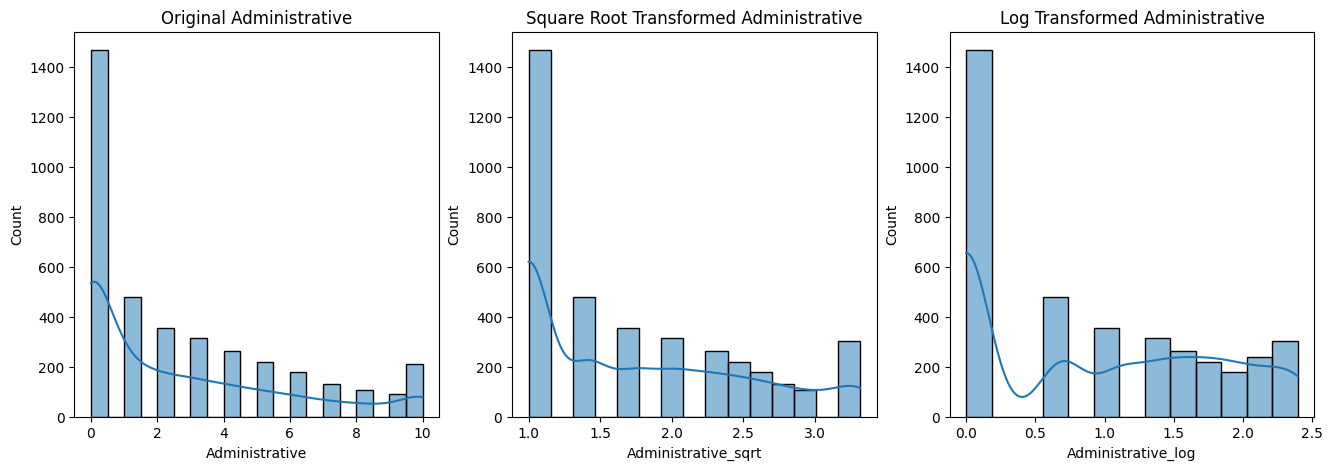

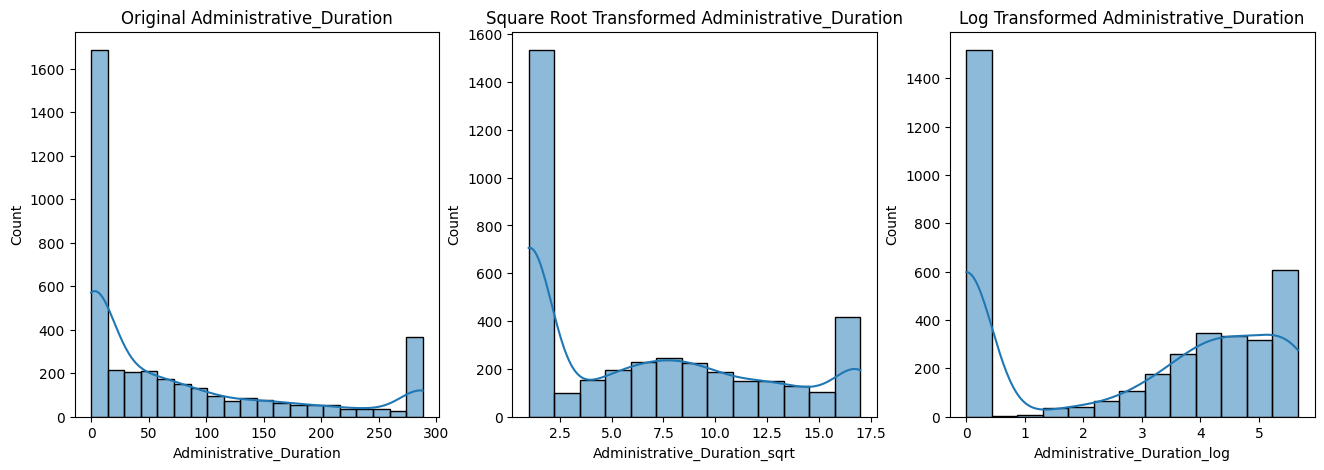

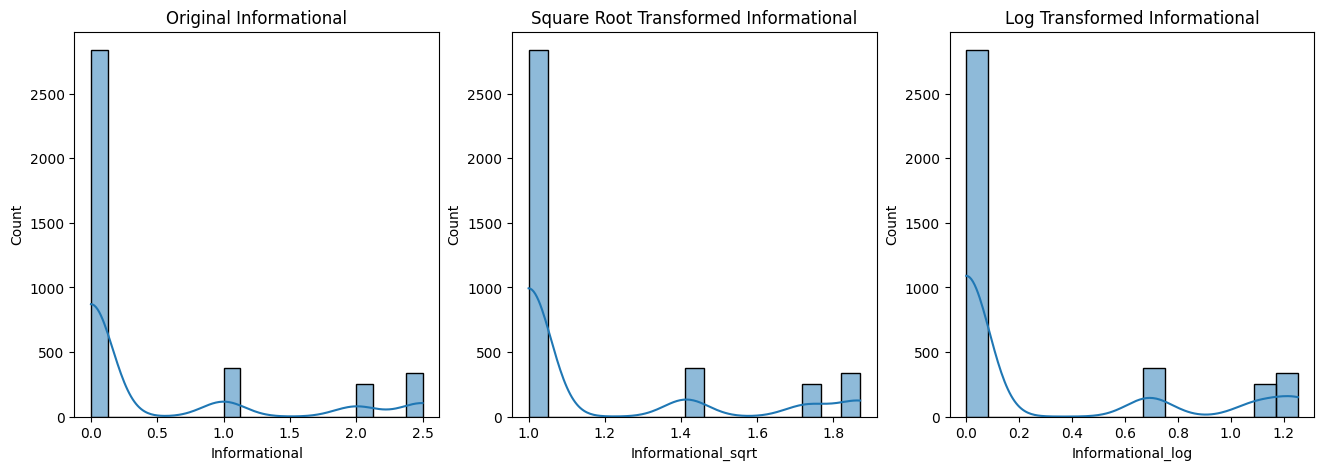

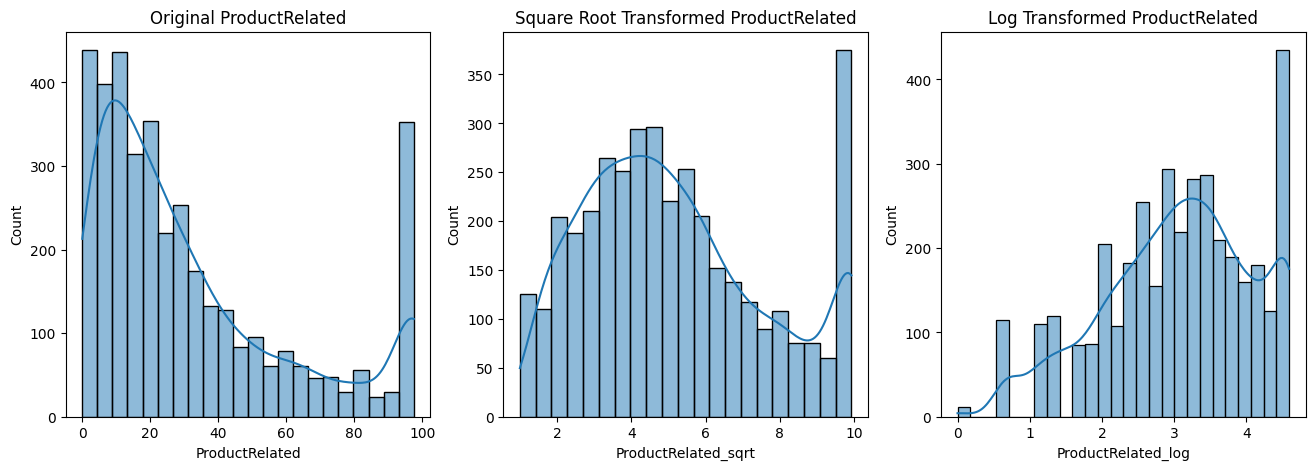

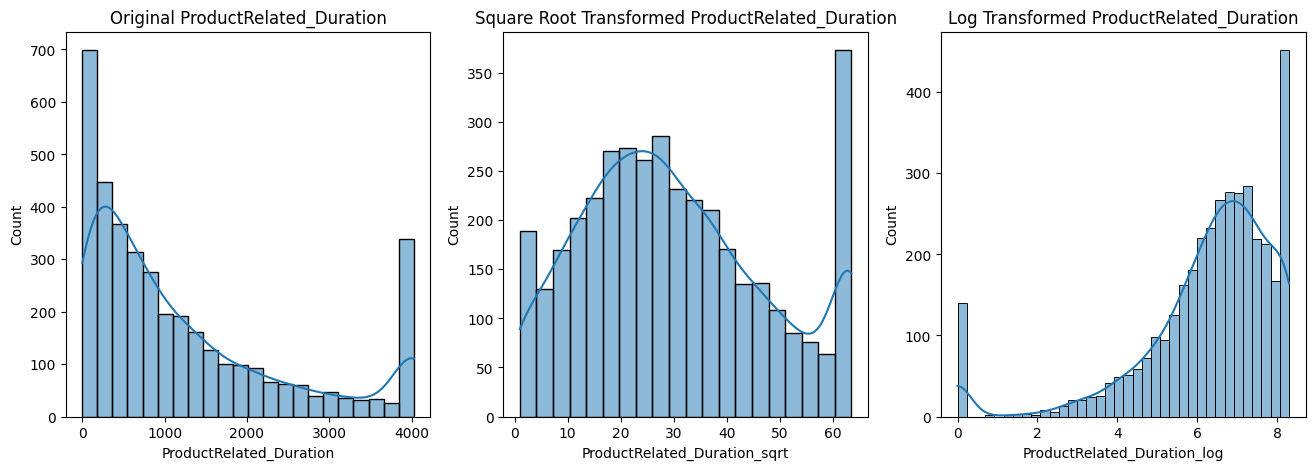

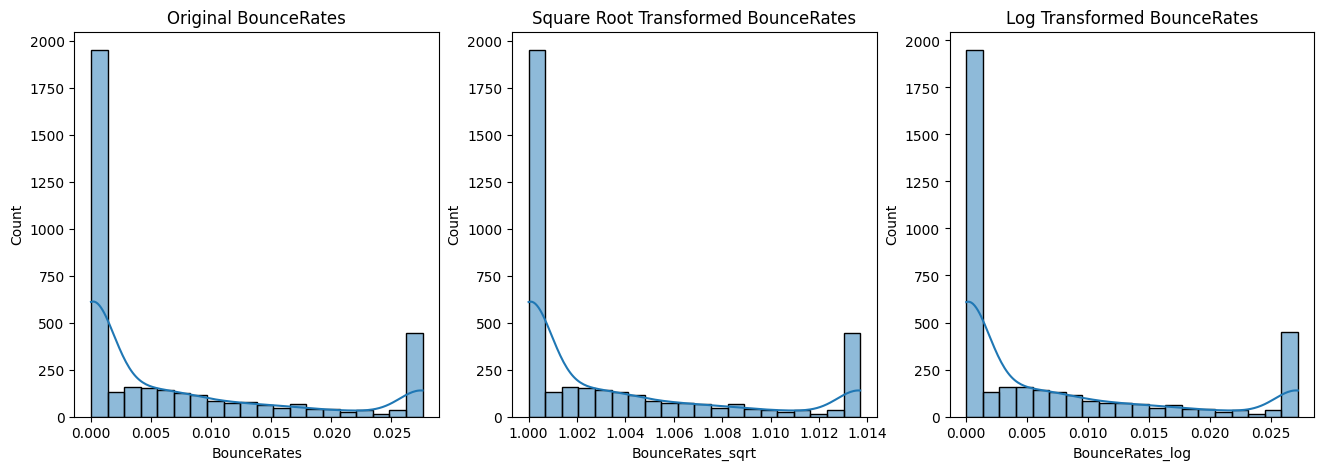

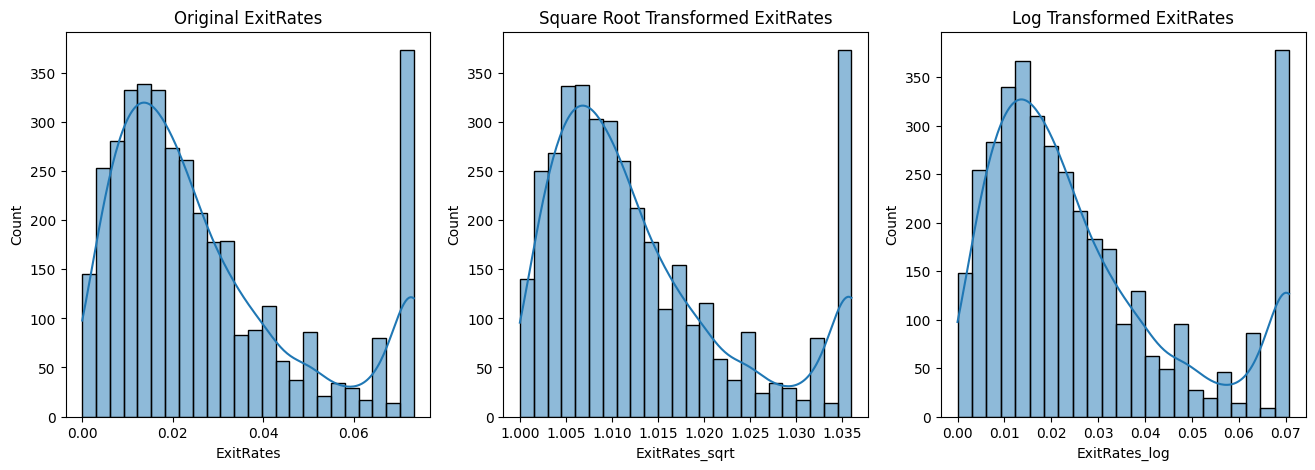

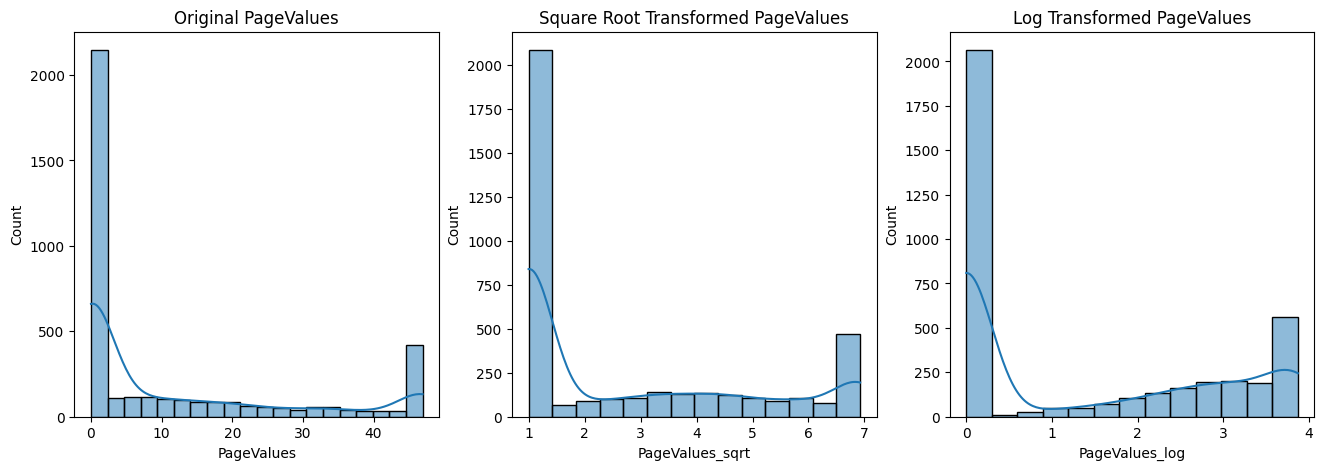

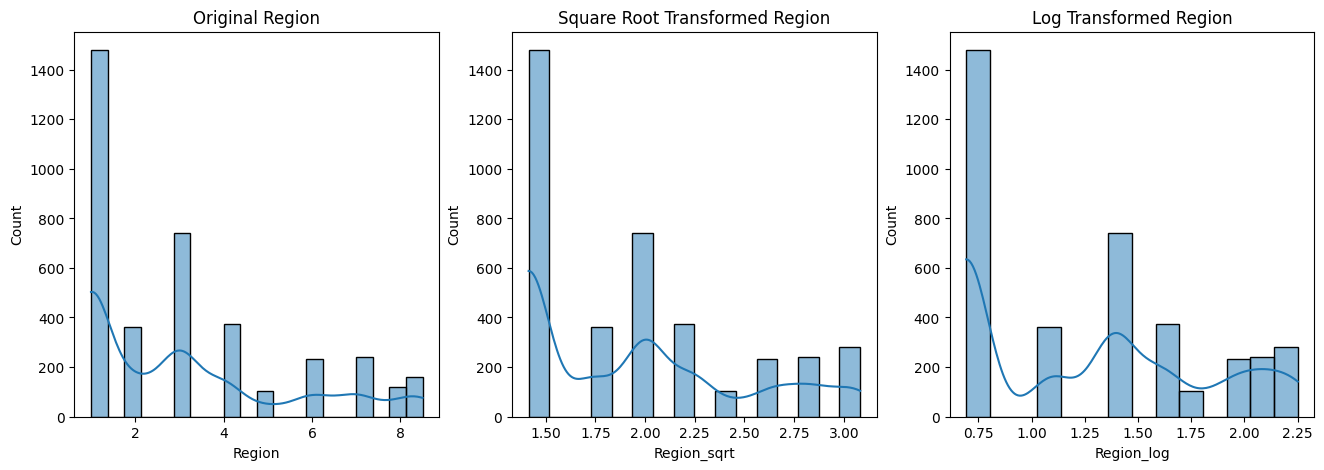

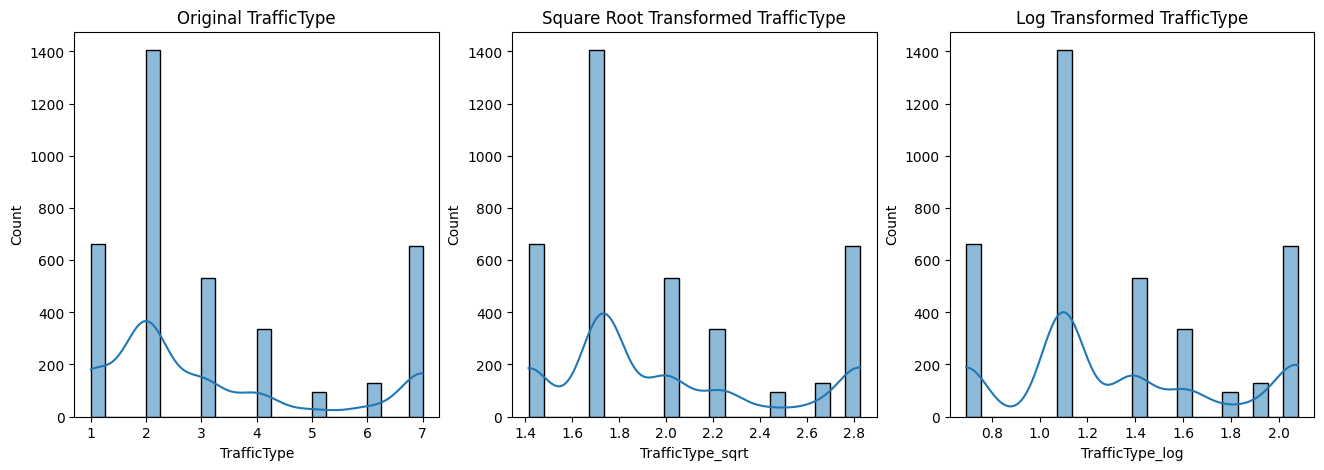

In [35]:
# Visualize original, square root, and log transformations
for feature in numerical_features:
    if skew(df[feature]) > 0.5:
        plt.figure(figsize=(16, 5))

        plt.subplot(1, 3, 1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Original {feature}')
        
        plt.subplot(1, 3, 2)
        sns.histplot(transformed_df[feature + '_sqrt'], kde=True)
        plt.title(f'Square Root Transformed {feature}')
        
        plt.subplot(1, 3, 3)
        sns.histplot(transformed_df[feature + '_log'], kde=True)
        plt.title(f'Log Transformed {feature}')

<h3 style="color:#DF2E38; text-align: center;">VISUALIZATION</h3>

In [36]:
# Save the transformed data to a CSV file
df.to_csv('undersampled_transformed_data.csv', index=False)

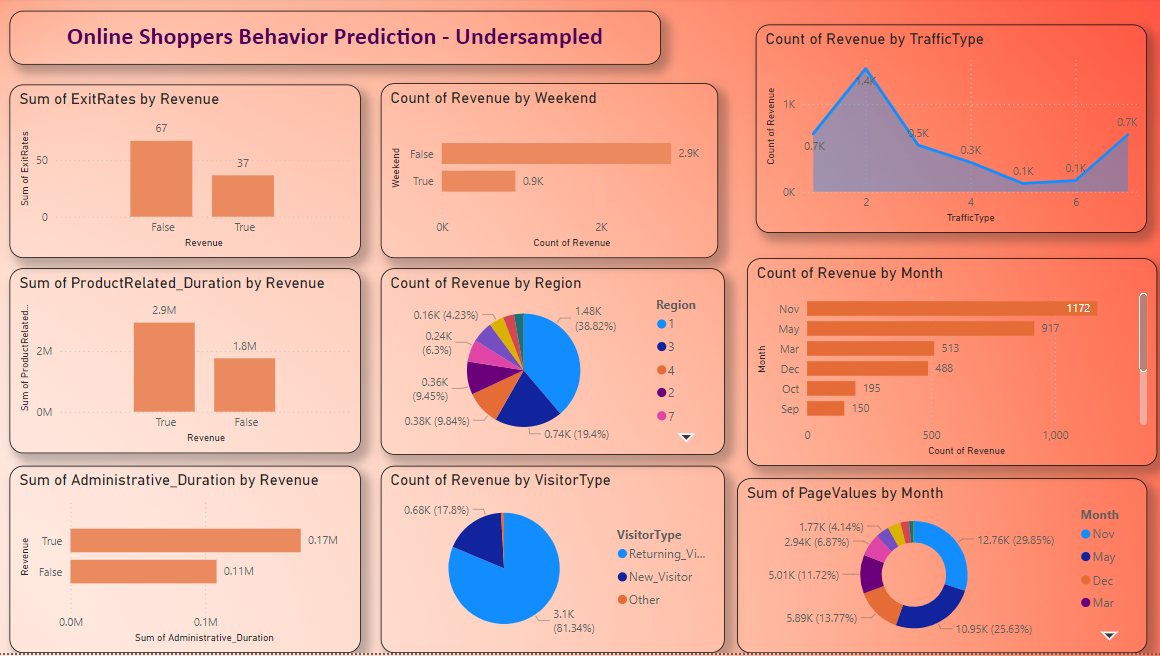

In [37]:
df.shape

(3810, 18)

<h3 style="color:#DF2E38; text-align: center;">FEATURE ENGINEERING </h3>

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with the dataset

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['Month'] = label_encoder.fit_transform(df['Month'])
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])

# Ensure 'Weekend' and 'Revenue' are encoded as integers
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Define features and target
X = df.drop(columns=['Revenue'])
y = df['Revenue']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop=None), categorical_cols)  # Include OneHotEncoder if you have additional nominal categorical features
    ],
    remainder='passthrough'  
)

# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)


In [40]:
df.shape

(3810, 18)

<h3 style="color:#DF2E38; text-align: center;">DATA SPLITTING</h3>

In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [42]:
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (3048, 17)
Testing set shape:  (762, 17)


<h3 style="color:#DF2E38; text-align: center;">MODEL SELECTION </h3>

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize lists to store metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Create a DataFrame from collected metrics
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "Confusion Matrix": conf_matrices
})

# Set the index to 'Model-Name'
models_df = models_df.set_index('Model-Name')

# Sort by 'F1 Score' in descending order
models_df_sorted = models_df.sort_values(by='F1 Score', ascending=False)

print(models_df_sorted)


                     Accuracy  Precision    Recall  F1 Score  \
Model-Name                                                     
Gradient Boost       0.837270   0.839542  0.811634  0.825352   
Random Forest        0.833333   0.828652  0.817175  0.822873   
AdaBoost             0.826772   0.848024  0.772853  0.808696   
Logistic Regression  0.796588   0.834416  0.711911  0.768311   
K-Nearest Neighbors  0.733596   0.719444  0.717452  0.718447   

                             Confusion Matrix  
Model-Name                                     
Gradient Boost         [[345, 56], [68, 293]]  
Random Forest          [[340, 61], [66, 295]]  
AdaBoost               [[351, 50], [82, 279]]  
Logistic Regression   [[350, 51], [104, 257]]  
K-Nearest Neighbors  [[300, 101], [102, 259]]  


**Gradient Boost** is the best overall model due to its high accuracy and balanced performance metrics. Random Forest is a close second, offering consistent and reliable results. AdaBoost provides high precision, making it useful in scenarios where minimizing false positives is crucial. Logistic Regression and K-Nearest Neighbors perform moderately well, but they are less effective than Gradient Boost and Random Forest for this classification task.

<h3 style="color:#DF2E38; text-align: center;">FEATURE SELECTION </h3>

#### 1. SelectKBest

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(score_func=f_classif, k=10)
k_best.fit(X, y)
X_k_best = k_best.transform(X)
selected_features_kbest = X.columns[k_best.get_support()]

print("Features selected by SelectKBest:", selected_features_kbest)


Features selected by SelectKBest: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'Month', 'VisitorType'],
      dtype='object')


#### Train the models with selected features using SelectKBest

In [45]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_k_best, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize lists to store metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Create a DataFrame from collected metrics
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "Confusion Matrix": conf_matrices
})

# Set the index to 'Model-Name'
models_df = models_df.set_index('Model-Name')

# Sort by 'F1 Score' in descending order
models_df_sorted = models_df.sort_values(by='F1 Score', ascending=False)

print(models_df_sorted)

                     Accuracy  Precision    Recall  F1 Score  \
Model-Name                                                     
Gradient Boost       0.834646   0.830986  0.817175  0.824022   
Random Forest        0.830709   0.813514  0.833795  0.823529   
AdaBoost             0.824147   0.842900  0.772853  0.806358   
Logistic Regression  0.779528   0.791541  0.725762  0.757225   
K-Nearest Neighbors  0.713911   0.698061  0.698061  0.698061   

                             Confusion Matrix  
Model-Name                                     
Gradient Boost         [[341, 60], [66, 295]]  
Random Forest          [[332, 69], [60, 301]]  
AdaBoost               [[349, 52], [82, 279]]  
Logistic Regression    [[332, 69], [99, 262]]  
K-Nearest Neighbors  [[292, 109], [109, 252]]  


- Gradient Boost perform well with a high F1 score, indicating a good balance between precision and recall. It has a relatively low number of false positives and false negatives, making it a reliable model for predictions.
- Random Forest shows consistent performance with good recall, indicating it effectively identifies positive cases. However, its precision is slightly lower than Gradient Boost, leading to a higher number of false positives.
- AdaBoost has the highest precision among the models, indicating it makes fewer false positive predictions. However, its recall is lower, resulting in more false negatives compared to Gradient Boost and Random Forest.
- Logistic Regression shows lower performance compared to the ensemble methods. Its precision and recall are both lower, resulting in a higher number of false negatives, which indicates it misses more positive cases.
- KNN has the lowest performance across all metrics. It struggles with both precision and recall, leading to a high number of false positives and false negatives. 

#### 2. Recursive Feature Elimination (RFE)

In [46]:
rf_classifier = RandomForestClassifier()
rfe = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)
rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]
X_rfe = rfe.transform(X)

print("Features selected by RFE with Random Forest Classifier:")
print(selected_features_rfe)

Features selected by RFE with Random Forest Classifier:
Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'Month', 'Region', 'TrafficType'],
      dtype='object')


#### Train the models with selected features using Recursive Feature Elimination (RFE)

In [47]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_rfe], y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize lists to store metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Create a DataFrame from collected metrics
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "Confusion Matrix": conf_matrices
})

# Set the index to 'Model-Name'
models_df = models_df.set_index('Model-Name')

print(models_df)


                     Accuracy  Precision    Recall  F1 Score  \
Model-Name                                                     
Logistic Regression  0.784777   0.814696  0.706371  0.756677   
Random Forest        0.826772   0.824363  0.806094  0.815126   
Gradient Boost       0.837270   0.839542  0.811634  0.825352   
AdaBoost             0.816273   0.844237  0.750693  0.794721   
K-Nearest Neighbors  0.717848   0.702778  0.700831  0.701803   

                             Confusion Matrix  
Model-Name                                     
Logistic Regression   [[343, 58], [106, 255]]  
Random Forest          [[339, 62], [70, 291]]  
Gradient Boost         [[345, 56], [68, 293]]  
AdaBoost               [[351, 50], [90, 271]]  
K-Nearest Neighbors  [[294, 107], [108, 253]]  


- Gradient Boosting performs the best overall with the highest F1 Score and a balanced precision and recall. It shows a good trade-off between precision and recall, making it a reliable model for predictions.
- Random Forest performs slightly worse than Gradient Boosting but still shows strong overall performance. It has a slightly lower recall and higher number of false negatives, which might indicate it is more conservative in its positive predictions.
- AdaBoost has a high precision but lower recall compared to Gradient Boosting and Random Forest. This suggests that AdaBoost is more cautious in making positive predictions, leading to fewer false positives but more false negatives.
- Logistic Regression shows a good precision but significantly lower recall. It has the highest number of false negatives among the top models, indicating it misses a higher proportion of positive cases.
- KNN has the lowest performance across all metrics. Its lower accuracy, precision, recall, and F1 score indicate that it is less effective in this context. It has the highest number of false positives and false negatives, suggesting it struggles with classification accuracy.

#### 3. Random Forest Feature Importance

In [48]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)
importances = rf_classifier.feature_importances_
# Create a Series of feature importances, indexed by feature names
feature_importances = pd.Series(importances, index=X.columns)

# Sort feature importances in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Select top 10 features based on importance scores
top_n = 10 
selected_features_rf = feature_importances_sorted.head(top_n).index.tolist()
X_selected = X[selected_features_rf]

print("Features selected by Random Forest Feature Importance:", selected_features_rf)


Features selected by Random Forest Feature Importance: ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated', 'Month', 'BounceRates', 'Administrative_Duration', 'Administrative', 'Region', 'TrafficType']


#### Train the models with selected features using Random Forest 

In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize lists to store metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Create a DataFrame from collected metrics
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "Confusion Matrix": conf_matrices
})

# Set the index to 'Model-Name'
models_df = models_df.set_index('Model-Name')

print(models_df)


                     Accuracy  Precision    Recall  F1 Score  \
Model-Name                                                     
Logistic Regression  0.790026   0.823151  0.709141  0.761905   
Random Forest        0.825459   0.820225  0.808864  0.814505   
Gradient Boost       0.837270   0.839542  0.811634  0.825352   
AdaBoost             0.816273   0.844237  0.750693  0.794721   
K-Nearest Neighbors  0.717848   0.702778  0.700831  0.701803   

                             Confusion Matrix  
Model-Name                                     
Logistic Regression   [[346, 55], [105, 256]]  
Random Forest          [[337, 64], [69, 292]]  
Gradient Boost         [[345, 56], [68, 293]]  
AdaBoost               [[351, 50], [90, 271]]  
K-Nearest Neighbors  [[294, 107], [108, 253]]  


- Gradient Boosting shows slightly improved performance over Random Forest with higher accuracy and precision. It maintains a good balance between precision and recall, indicating robust performance.
- Random Forest performs well with high accuracy and balanced precision and recall. It effectively identifies both true positives and true negatives with fewer misclassifications compared to Logistic Regression.
- Logistic Regression shows balanced performance with good precision and acceptable recall. It correctly predicts both positive and negative cases, but with some misclassifications.
- AdaBoost achieves high precision but at the cost of lower recall compared to Gradient Boost and Random Forest. It correctly identifies positive cases (high precision) but misses some actual positives (lower recall).
-  K-Nearest Neighbors (KNN) shows the lowest performance metrics among the models evaluated. It has lower accuracy, precision, recall, and F1 score compared to other models. KNN struggles with the classification task, particularly in correctly identifying both positive and negative cases.

<h3 style="color:#DF2E38; text-align: center;">HYPERPARAMETER TUNING </h3>

In [50]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 1.0]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the models with their respective hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Gradient Boost': (GradientBoostingClassifier(), param_grid_gb),
    'AdaBoost': (AdaBoostClassifier(), param_grid_ada),
    'K-Nearest Neighbors': (KNeighborsClassifier(), param_grid_knn)
}

# Perform hyperparameter tuning for each model
best_models = {}
for name, (model, param_grid) in models.items():
    print(f"Starting GridSearch for {name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=10)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Completed GridSearch for {name}")
    
# Print best hyperparameters for each model
for name, model in best_models.items():
    print(f"Best hyperparameters for {name}: {model}")

# Evaluate best models on test set and print accuracy
results = {}
for name, model in best_models.items():
    accuracy = model.score(X_test, y_test)
    results[name] = accuracy
    print(f"Test accuracy for {name}: {accuracy}")


Starting GridSearch for Logistic Regression
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START C=0.001, max_iter=100......................................
[CV 1/3; 1/18] END .......C=0.001, max_iter=100;, score=0.814 total time=   0.0s
[CV 2/3; 1/18] START C=0.001, max_iter=100......................................
[CV 2/3; 1/18] END .......C=0.001, max_iter=100;, score=0.817 total time=   0.0s
[CV 3/3; 1/18] START C=0.001, max_iter=100......................................
[CV 3/3; 1/18] END .......C=0.001, max_iter=100;, score=0.850 total time=   0.0s
[CV 1/3; 2/18] START C=0.001, max_iter=200......................................
[CV 1/3; 2/18] END .......C=0.001, max_iter=200;, score=0.815 total time=   0.1s
[CV 2/3; 2/18] START C=0.001, max_iter=200......................................
[CV 2/3; 2/18] END .......C=0.001, max_iter=200;, score=0.812 total time=   0.1s
[CV 3/3; 2/18] START C=0.001, max_iter=200......................................
[CV 

In [51]:
# Create a DataFrame to store results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy'])
results_df.index.name = 'Model'

print("\nResults:")
print(results_df)


Results:
                     Test Accuracy
Model                             
Logistic Regression       0.795276
Random Forest             0.829396
Gradient Boost            0.826772
AdaBoost                  0.821522
K-Nearest Neighbors       0.737533


- Random Forest: Best improvement with test accuracy of 0.829396 after tuning.
- Gradient Boost: Close second with test accuracy of 0.826772, showing substantial improvement from tuning.
- AdaBoost: Good performance with test accuracy of 0.821522, benefiting from tuning.
- Logistic Regression: Moderate improvement with test accuracy of 0.795276.
- K-Nearest Neighbors (KNN): Lowest test accuracy of 0.737533, indicating less benefit from hyperparameter tuning.

<h3 style="color:#DF2E38; text-align: center;"> CONCLUSION </h3>

- Best Overall Model: Gradient Boost due to its high accuracy, balanced performance metrics, and substantial improvement from hyperparameter tuning.
- Second Best: Random Forest, offering consistent and reliable results with significant performance improvement from tuning.
- High Precision: AdaBoost, particularly useful when minimizing false positives is crucial.
- Moderate Performance: Logistic Regression, with balanced metrics but lower overall effectiveness compared to ensemble methods.
- Lowest Performance: K-Nearest Neighbors, struggling with classification accuracy and benefiting less from hyperparameter tuning.
